In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import illustris_python as il
import h5py
import pandas as pd
from tqdm.notebook import tqdm#barrita
#importar funciones de circularidad
from circularity import spherical_coords_from_vector             #formato: spherical_coords_from_vector(vector)
from circularity import matrix_from_spherical                    #formato: matrix_from_spherical(r,theta,phi)
from circularity import inertia_tensor                           #formato: inertia_tensor(Masas, Coordenadas, Centralpos)
from circularity import diagonalization_of_inertia               #formato: diagonalization_of_inertia(I)
from circularity import star_particles_rotated_once_eulermethod  #formato: star_particles_rotated_once_eulermethod(subhaloid, snapshotnum, basepath,radius_limit,minmetal,maxmetal)
from circularity import star_particles_rotated_once              #formato: star_particles_rotated_once(subhaloid, snapshotnum, basepath,radius_limit,minmetal,maxmetal)
from circularity import circularities_eulermethod                #formato: circularities_eulermethod(subhaloID,snapNum,basepath,radius_limit,metallicity_cutoff,radius_limit_rotation,minmetal_rotation,maxmetal_rotation)
from circularity import circularities_diagmethod                 #formato: circularities_diagmethod(subhaloID,snapNum,basepath,radius_limit,metallicity_cutoff,radius_limit_rotation,minmetal_rotation,maxmetal_rotation)



In [2]:
Classified_subhalos = np.genfromtxt('Classified_subhalos_TNG50-1.csv',skip_header=1,delimiter=',')
#Classified_subhalos[:,1] IDs
#Classified_subhalos[:,2] MASAS
#Classified_subhalos[:,3] R200

snapNum = 99
basepath = '/home/tnguser/sims.TNG/TNG50-1/output'


total = 0

for i in tqdm(range(0,len(Classified_subhalos[:,1]))):
    total += 1
    subhaloID = Classified_subhalos[i,1]
    R200 = Classified_subhalos[i,3]
    stars = circularities_eulermethod(subhaloID,snapNum,basepath,radius_limit=1.0*R200,minmetal=0.01,maxmetal=3.0,radius_limit_rotation=0.2*R200,minmetal_rotation=0.95,maxmetal_rotation=1.5)
    
    #Conditioning
    wStars = np.where( (stars['Circularity'] <= -0.7) & (stars['Coordinates'][:,2] >= -10) & (stars['Coordinates'][:,2] <= 10) )
    
    counter_stars = {}
    counter_stars['Masses'] = stars['Masses'][wStars]
    counter_stars['Coordinates'] = stars['Coordinates'][wStars]
    counter_stars['Velocities'] = stars['Velocities'][wStars]
    counter_stars['GFM_Metallicity'] = stars['GFM_Metallicity'][wStars]
    counter_stars['Potential'] = stars['Potential'][wStars]
    counter_stars['GFM_StellarFormationTime'] = stars['GFM_StellarFormationTime'][wStars]
    counter_stars['Distance_to_center'] = stars['Distance_to_center'][wStars]
    counter_stars['Angular_Momentum'] = stars['Angular_Momentum'][wStars]
    counter_stars['Total Energy'] = stars['Specific_Energy'][wStars]
    counter_stars['Circularity'] = stars['Circularity'][wStars]
    counter_stars['ParticleIDs'] = stars['ParticleIDs'][wStars]
    
    
    counter_stars_df = pd.DataFrame()
    counter_stars_df['M'] = counter_stars['Masses']
    counter_stars_df['x'] = counter_stars['Coordinates'][:,0]
    counter_stars_df['y'] = counter_stars['Coordinates'][:,1]
    counter_stars_df['z'] = counter_stars['Coordinates'][:,2]
    counter_stars_df['Vx'] = counter_stars['Velocities'][:,0]
    counter_stars_df['Vy'] = counter_stars['Velocities'][:,1]
    counter_stars_df['Vz'] = counter_stars['Velocities'][:,2]
    counter_stars_df['Metallicity'] = counter_stars['GFM_Metallicity']
    counter_stars_df['U'] = counter_stars['Potential']
    counter_stars_df['StellarFormationTime'] = counter_stars['GFM_StellarFormationTime']
    counter_stars_df['R'] = counter_stars['Distance_to_center']
    counter_stars_df['Jx'] = counter_stars['Angular_Momentum'][:,0]
    counter_stars_df['Jy'] = counter_stars['Angular_Momentum'][:,1]
    counter_stars_df['Jz'] = counter_stars['Angular_Momentum'][:,2]
    counter_stars_df['Total Energy'] = counter_stars['Total Energy'] #i wrongly called it specific energy dont knuw why
    counter_stars_df['Circularity'] = counter_stars['Circularity']
    counter_stars_df['ParticleIDs'] = counter_stars['ParticleIDs']
    
    counter_stars_df.to_csv('subhalo_tables_extras/subhalo%s_counterrotatingdisk.csv'%subhaloID)
    
    
    
print(total,len(Classified_subhalos[:,1]))

  0%|          | 0/261 [00:00<?, ?it/s]

7.22676300098
[[ -3.22721045e-08   2.58888243e-07   9.71396030e+08]]
-----------------------
 [  4.17033165e+07  -6.79831315e+07   3.34124913e+09]
7.60947882258
[[  5.74553996e-07   1.51470726e-08   1.20198869e+09]]


KeyboardInterrupt: 

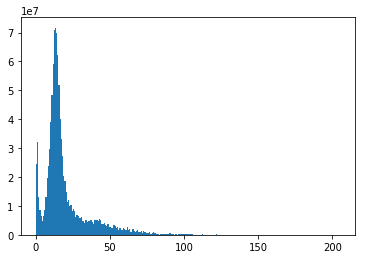

In [4]:
subhaloid = 547844.0

subhalo_df = pd.read_csv('subhalo_tables/subhalo%s_counterrotating.csv'%subhaloid)

#ordenando por distancia al centro
sorted_indexes = np.argsort(subhalo_df['R'])


R = subhalo_df['R']
M = subhalo_df['M']


maximo_R = max(R)
bines = 256
intervalos = np.arange(0,maximo_R,maximo_R/bines)
alturas = []
intervalos_centros = []


for i in range(len(intervalos)-1):
    cota_inferior = intervalos[i]
    cota_superior = intervalos[i+1]
    centro = ((cota_superior + cota_inferior)/2)
    intervalos_centros.append(centro)
    
    suma_masas = 0
    for j in range(len(R)):
        if (R[j] < cota_superior) and (R[j] > cota_inferior):
            suma_masas += M[j]
        else:
            continue
    alturas.append(suma_masas)

plt.bar(intervalos_centros,alturas,width=max(R)/bines)
plt.show()

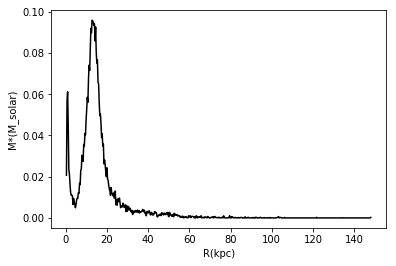

In [5]:
subhaloid = 547844.0#455291.0

subhalo_df = pd.read_csv('subhalo_tables_extras/subhalo%s_counterrotatingdisk.csv'%subhaloid)

A = plt.hist(subhalo_df['R'],weights=subhalo_df['M'],bins=512,density=True)
plt.clf()
plt.plot((A[1][:len(A[1])-1]+A[1][1:])/2,A[0], color='black')
plt.xlabel('R(kpc)')
plt.ylabel('M*(M_solar)')
#plt.title('Fraction of total counterrotating M* according to distance(ID %s)'%int(subhaloid))
plt.savefig('non_cumulative_mass_test.pdf',dpi=100)

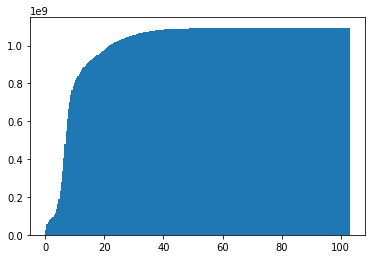

In [6]:
subhaloid = 547844.0

subhalo_df = pd.read_csv('subhalo_tables/subhalo%s_counterrotating.csv'%subhaloid)

#ordenando por distancia al centro
sorted_indexes = np.argsort(subhalo_df['R'])


R = subhalo_df['R']
M = subhalo_df['M']


maximo_R = max(R)
bines = 256
intervalos = np.arange(0,maximo_R,maximo_R/bines)
alturas = []
intervalos_centros = []


for i in range(len(intervalos)-1):
    cota_inferior = 0
    cota_superior = intervalos[i+1]
    centro = ((cota_superior + cota_inferior)/2)
    intervalos_centros.append(centro)
    
    suma_masas = 0
    for j in range(len(R)):
        if (R[j] < cota_superior) and (R[j] > cota_inferior):
            suma_masas += M[j]
        else:
            continue
    alturas.append(suma_masas)

plt.bar(intervalos_centros,alturas,width=max(R)/bines)
plt.show()

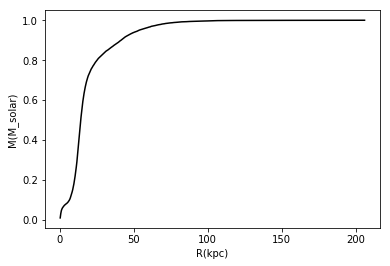

In [8]:
subhaloid = 547844.0

subhalo_df = pd.read_csv('subhalo_tables/subhalo%s_counterrotating.csv'%subhaloid)

A = plt.hist(subhalo_df['R'],weights=subhalo_df['M'],bins=512,cumulative=True,density=True)
plt.clf()
plt.plot((A[1][:len(A[1])-1]+A[1][1:])/2,A[0],color='black')
#plt.title('Cumulative counterrotating M* according to distance(ID %s)'%int(subhaloid))
plt.xlabel('R(kpc)')
plt.ylabel('M(M_solar)')
plt.savefig('cumulative_mass_test.pdf',dpi=100)

# AHORA EL GRIDSPEC DE TODA LA WEAAAAAAAA
## lo siento es que estos dias estan duros
##### aunque estoy con la esperanza de que esto solo lo lea yo mismo, caso contrario... hola youtubeee!


  0%|          | 0/11 [00:00<?, ?it/s]

subhalo_images/Subhalos_counterrotating_massdistribution_0.png
subhalo_images/Subhalos_counterrotating_massdistribution_25.png
subhalo_images/Subhalos_counterrotating_massdistribution_50.png
subhalo_images/Subhalos_counterrotating_massdistribution_75.png
subhalo_images/Subhalos_counterrotating_massdistribution_100.png
subhalo_images/Subhalos_counterrotating_massdistribution_125.png
subhalo_images/Subhalos_counterrotating_massdistribution_150.png
subhalo_images/Subhalos_counterrotating_massdistribution_175.png
subhalo_images/Subhalos_counterrotating_massdistribution_200.png
subhalo_images/Subhalos_counterrotating_massdistribution_225.png
subhalo_images/Subhalos_counterrotating_massdistribution_250.png


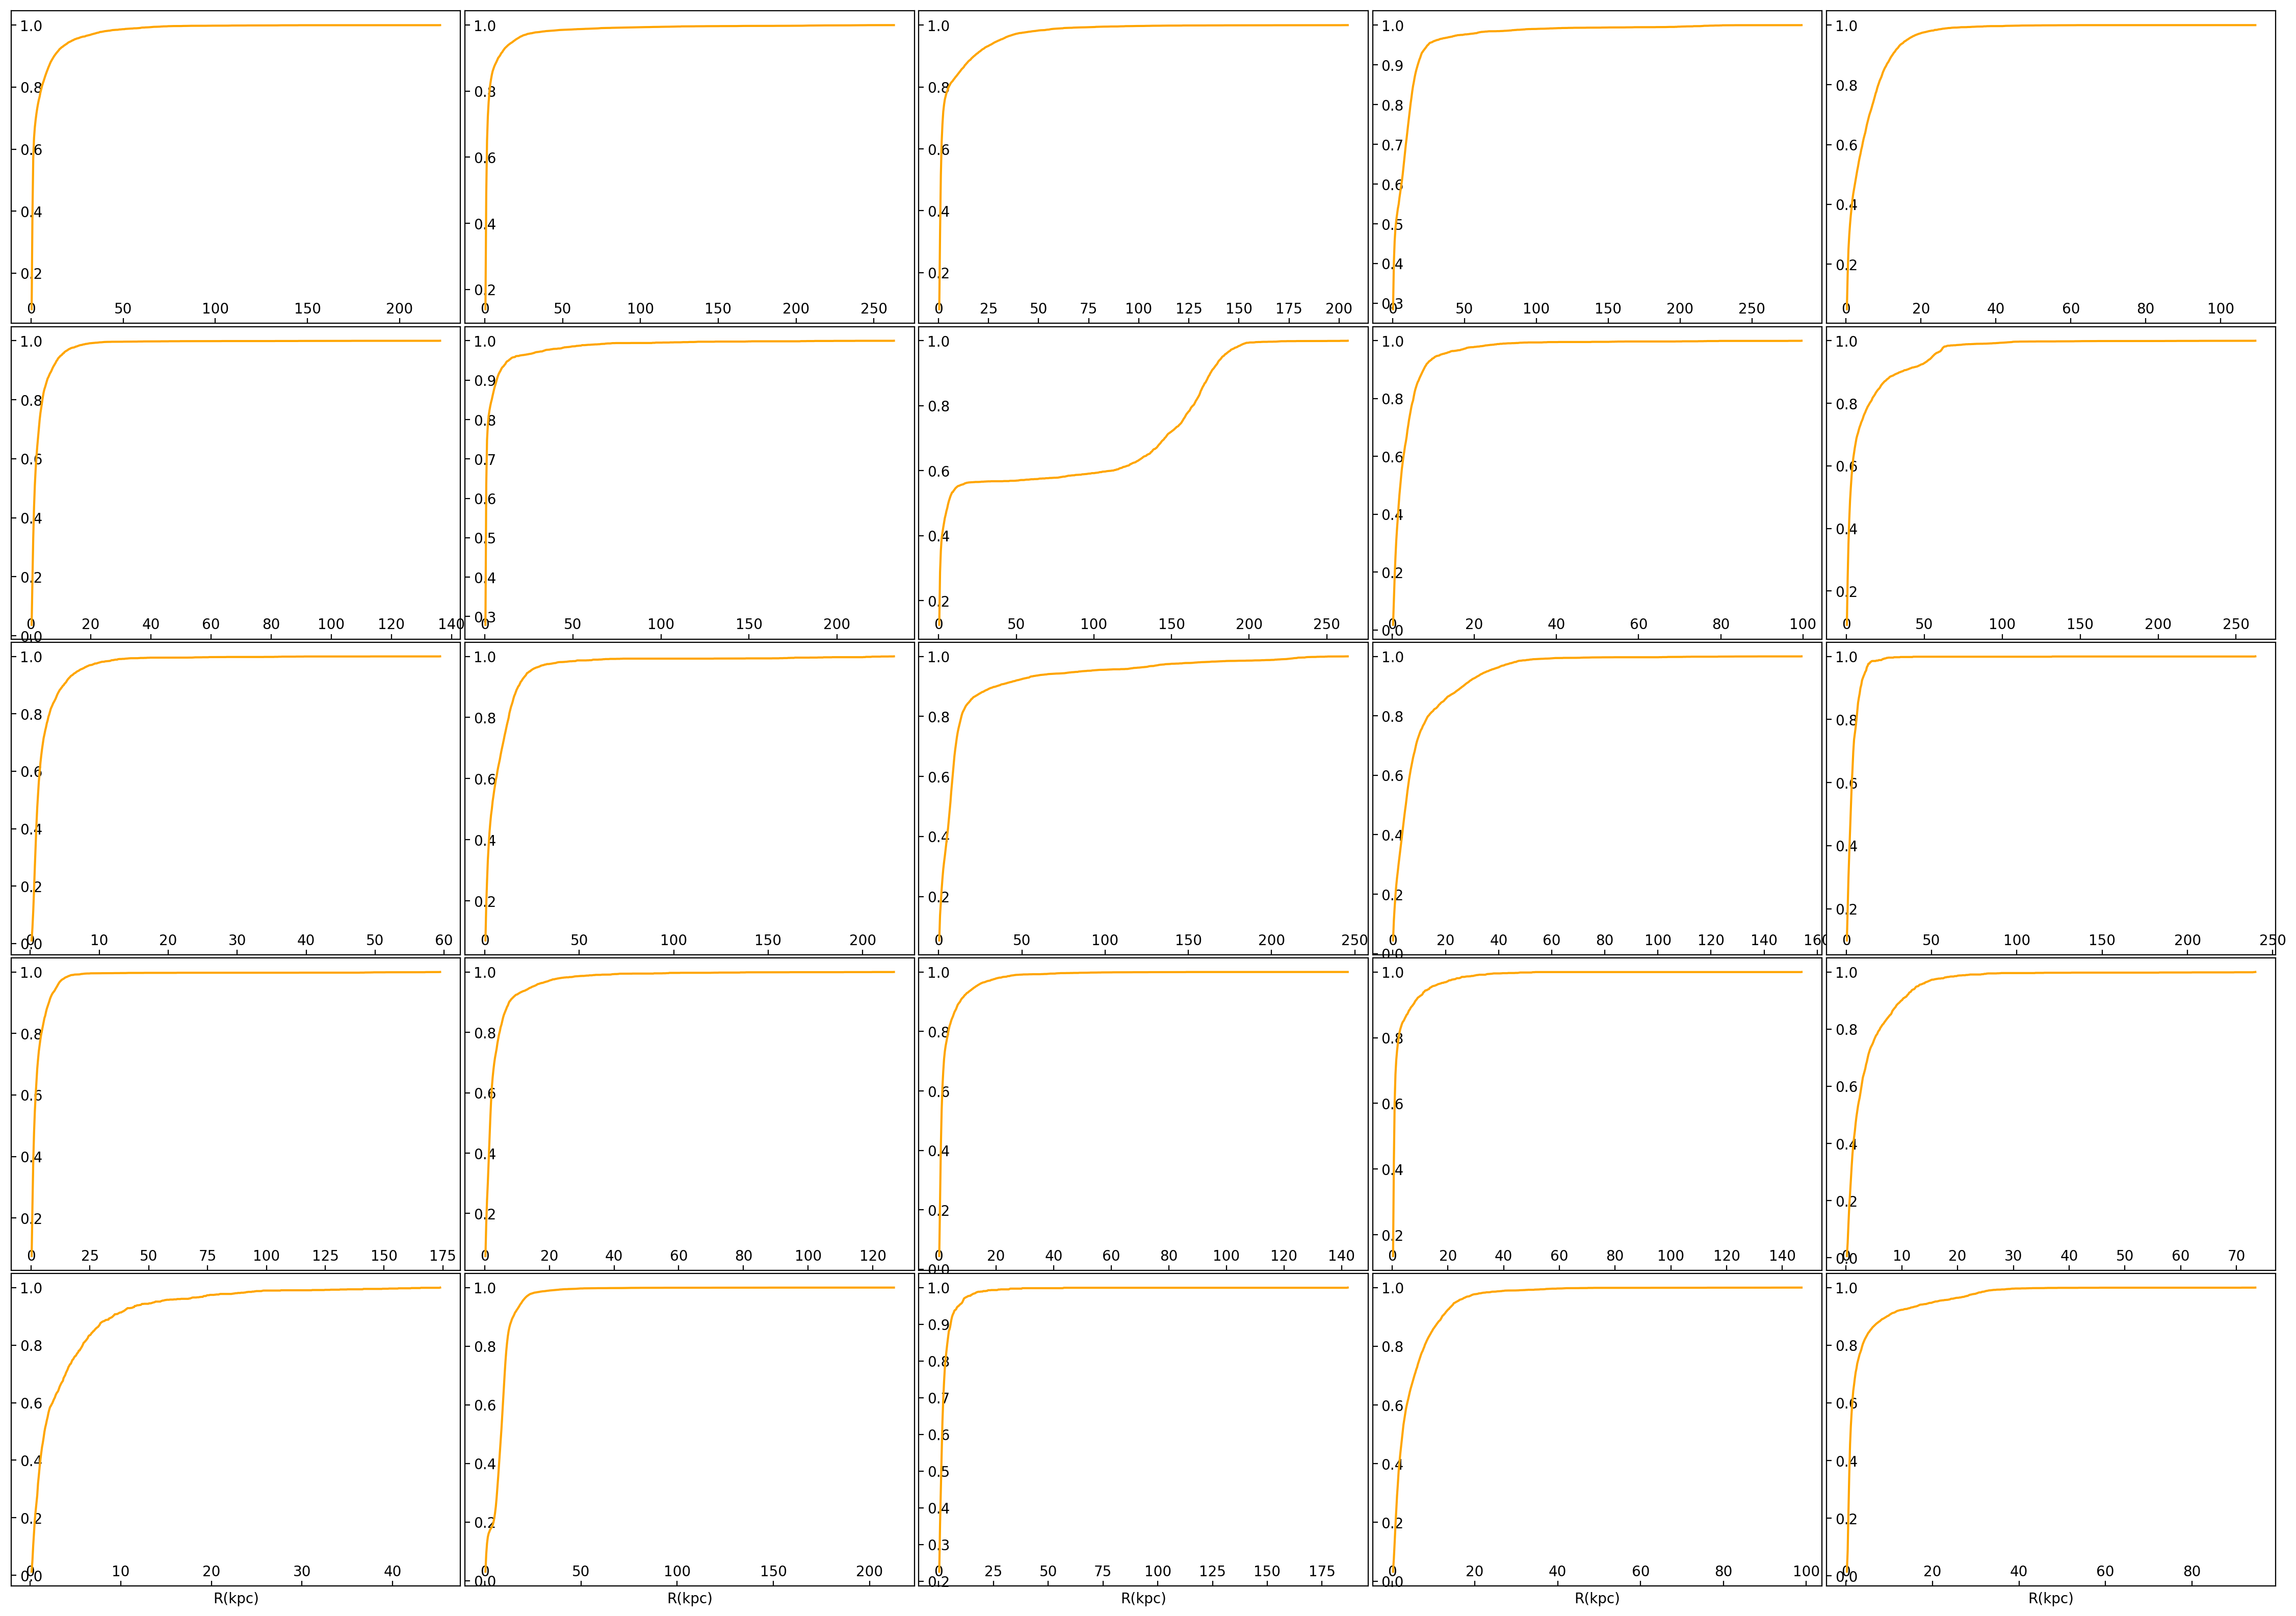

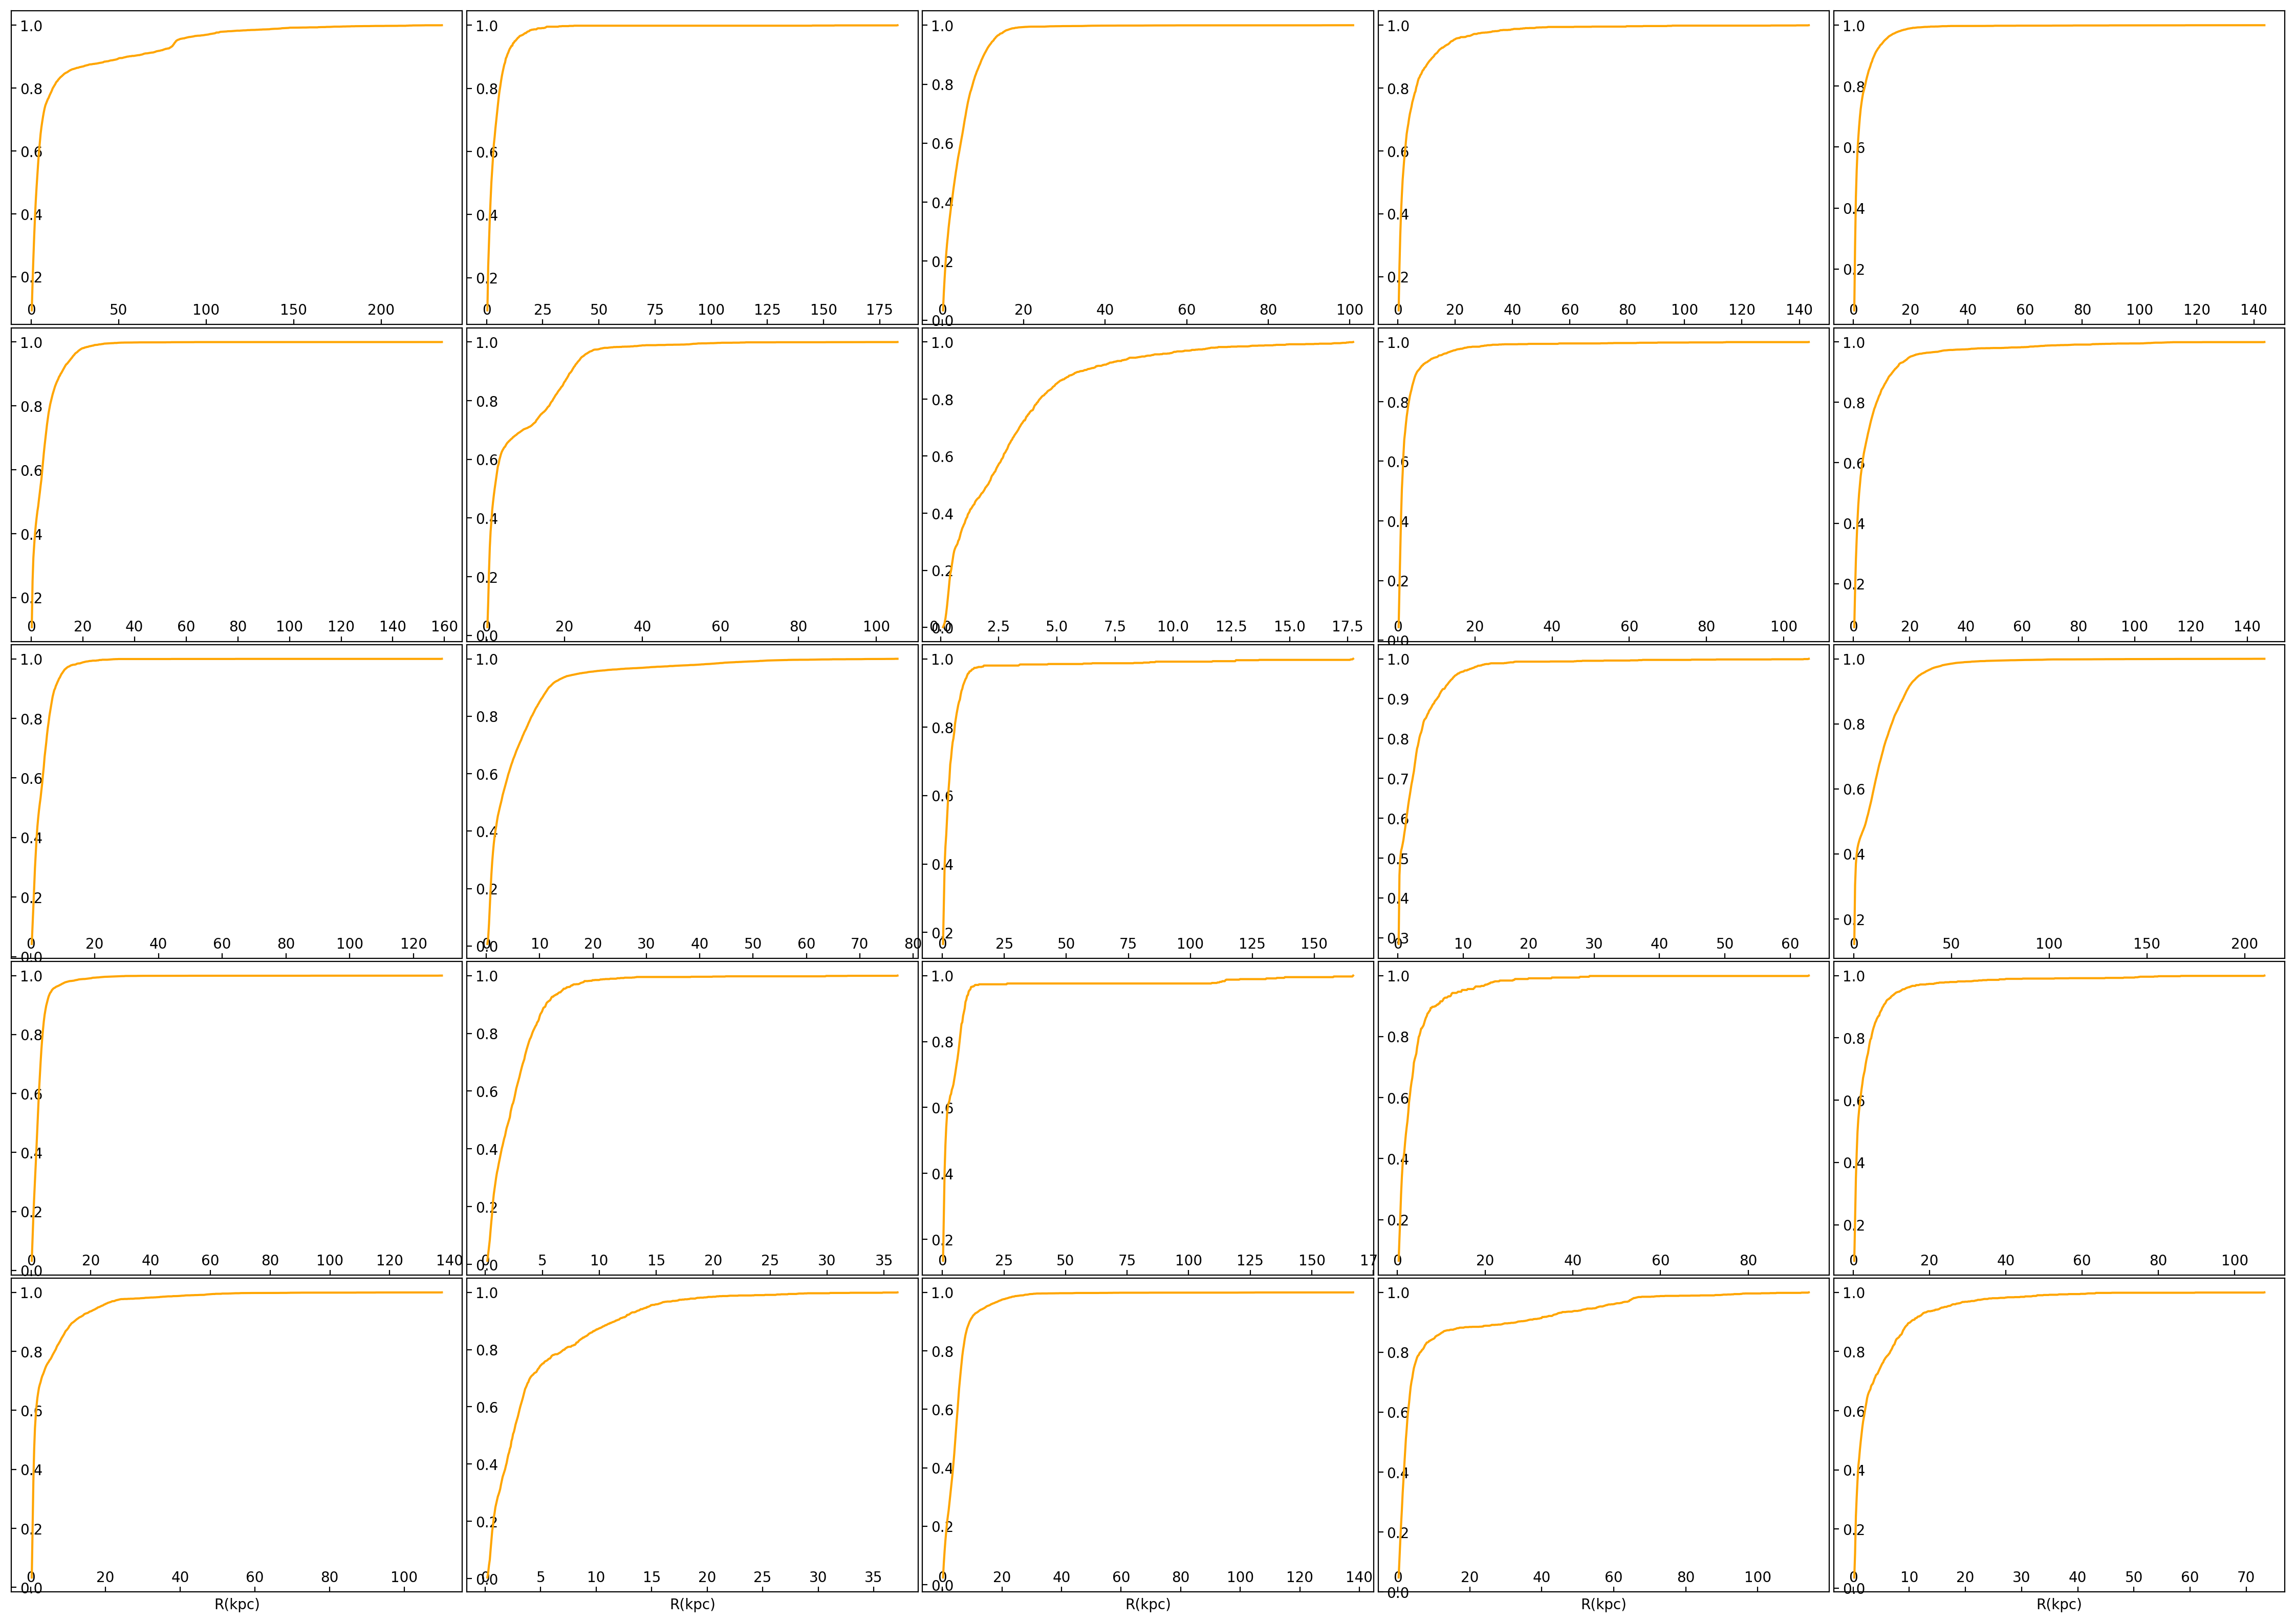

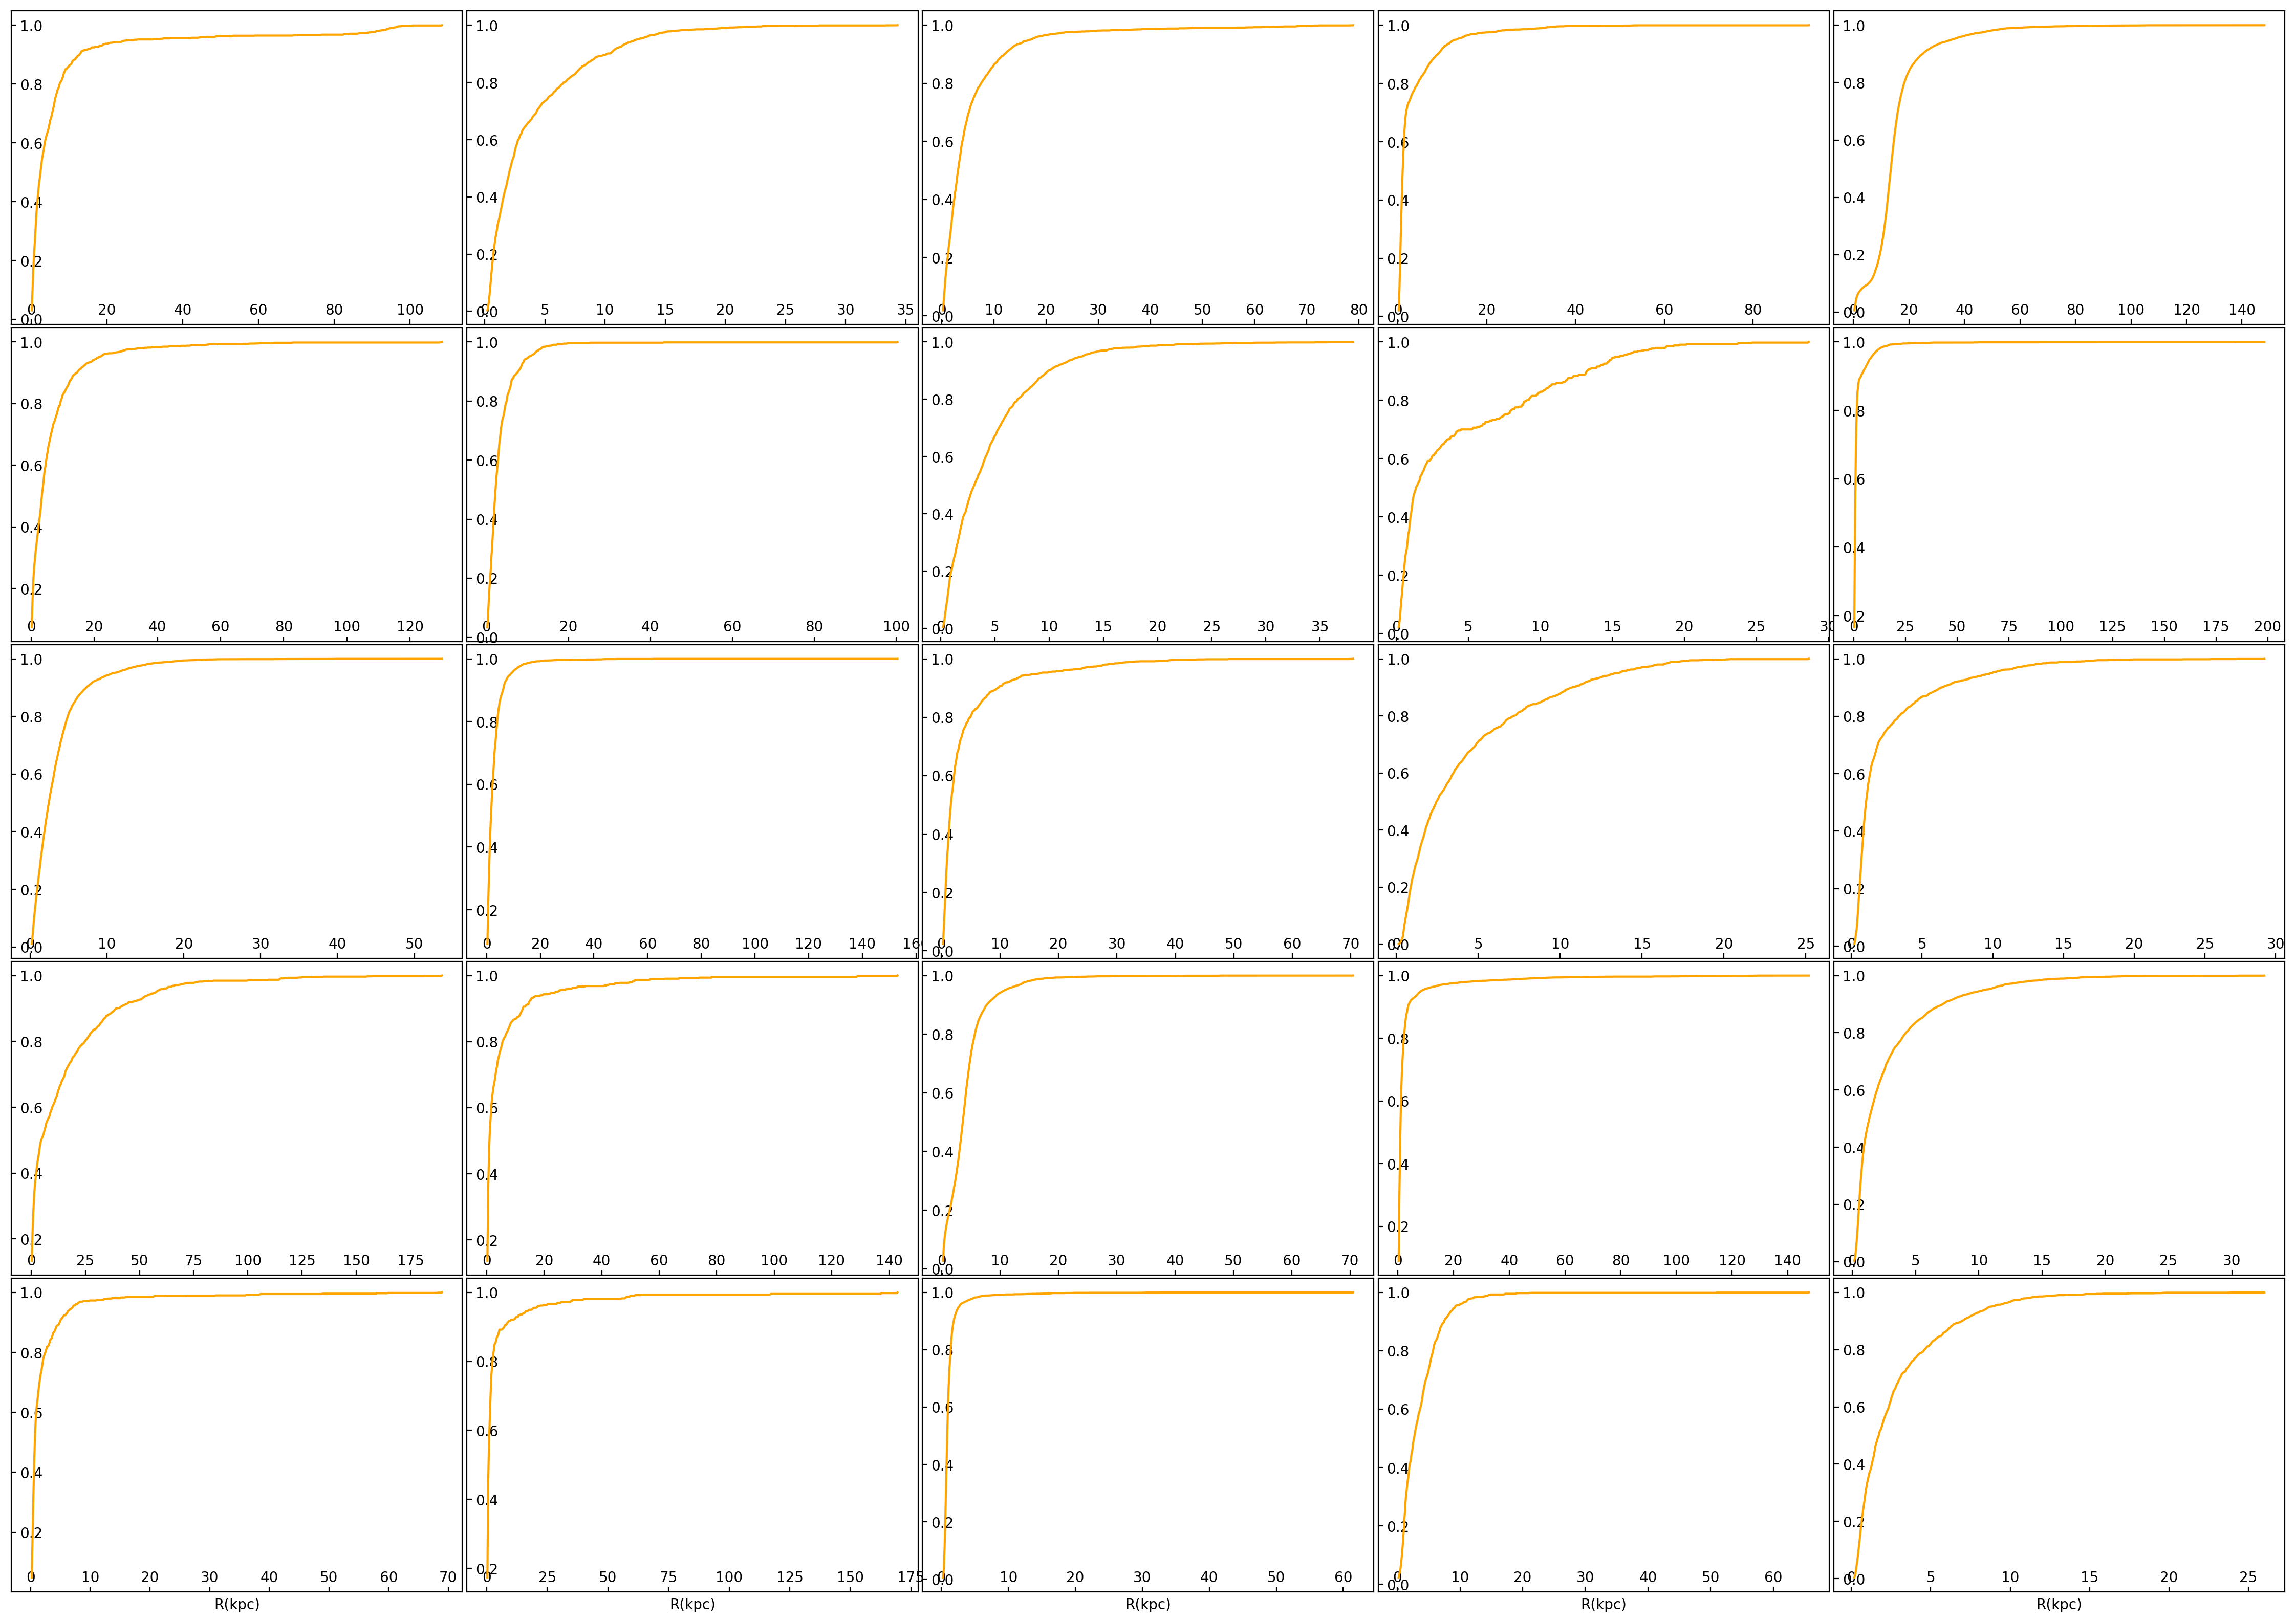

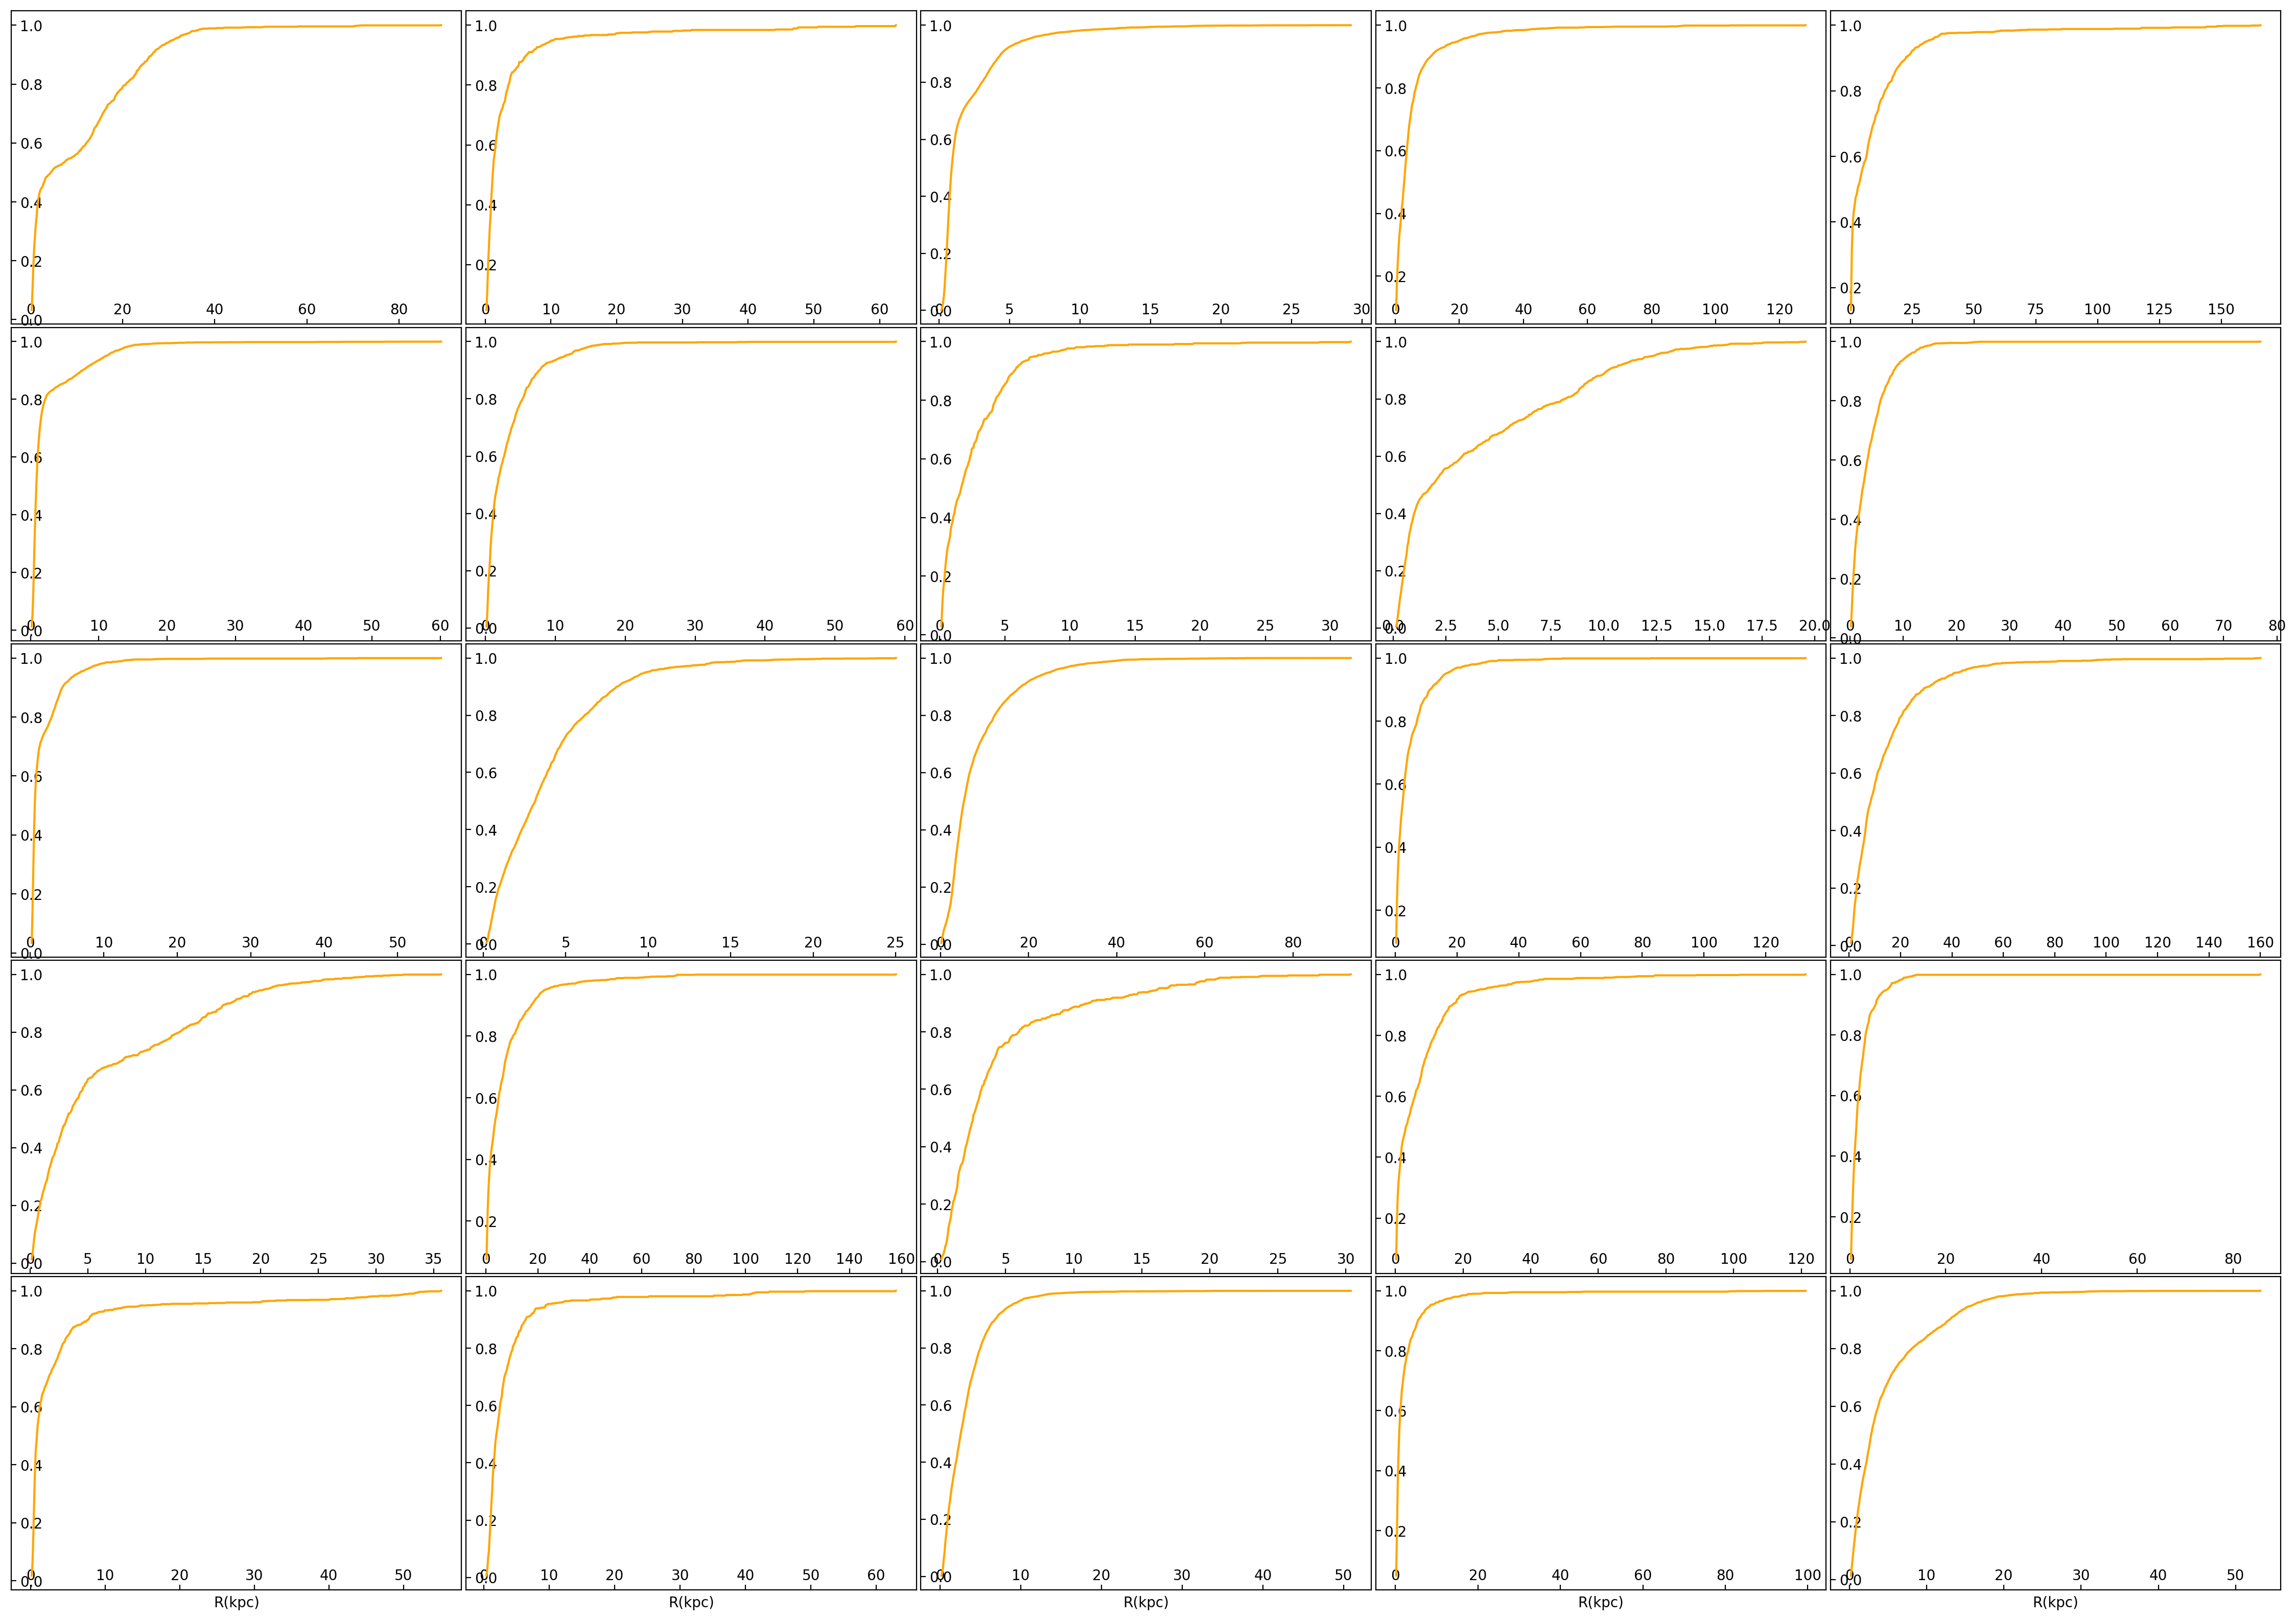

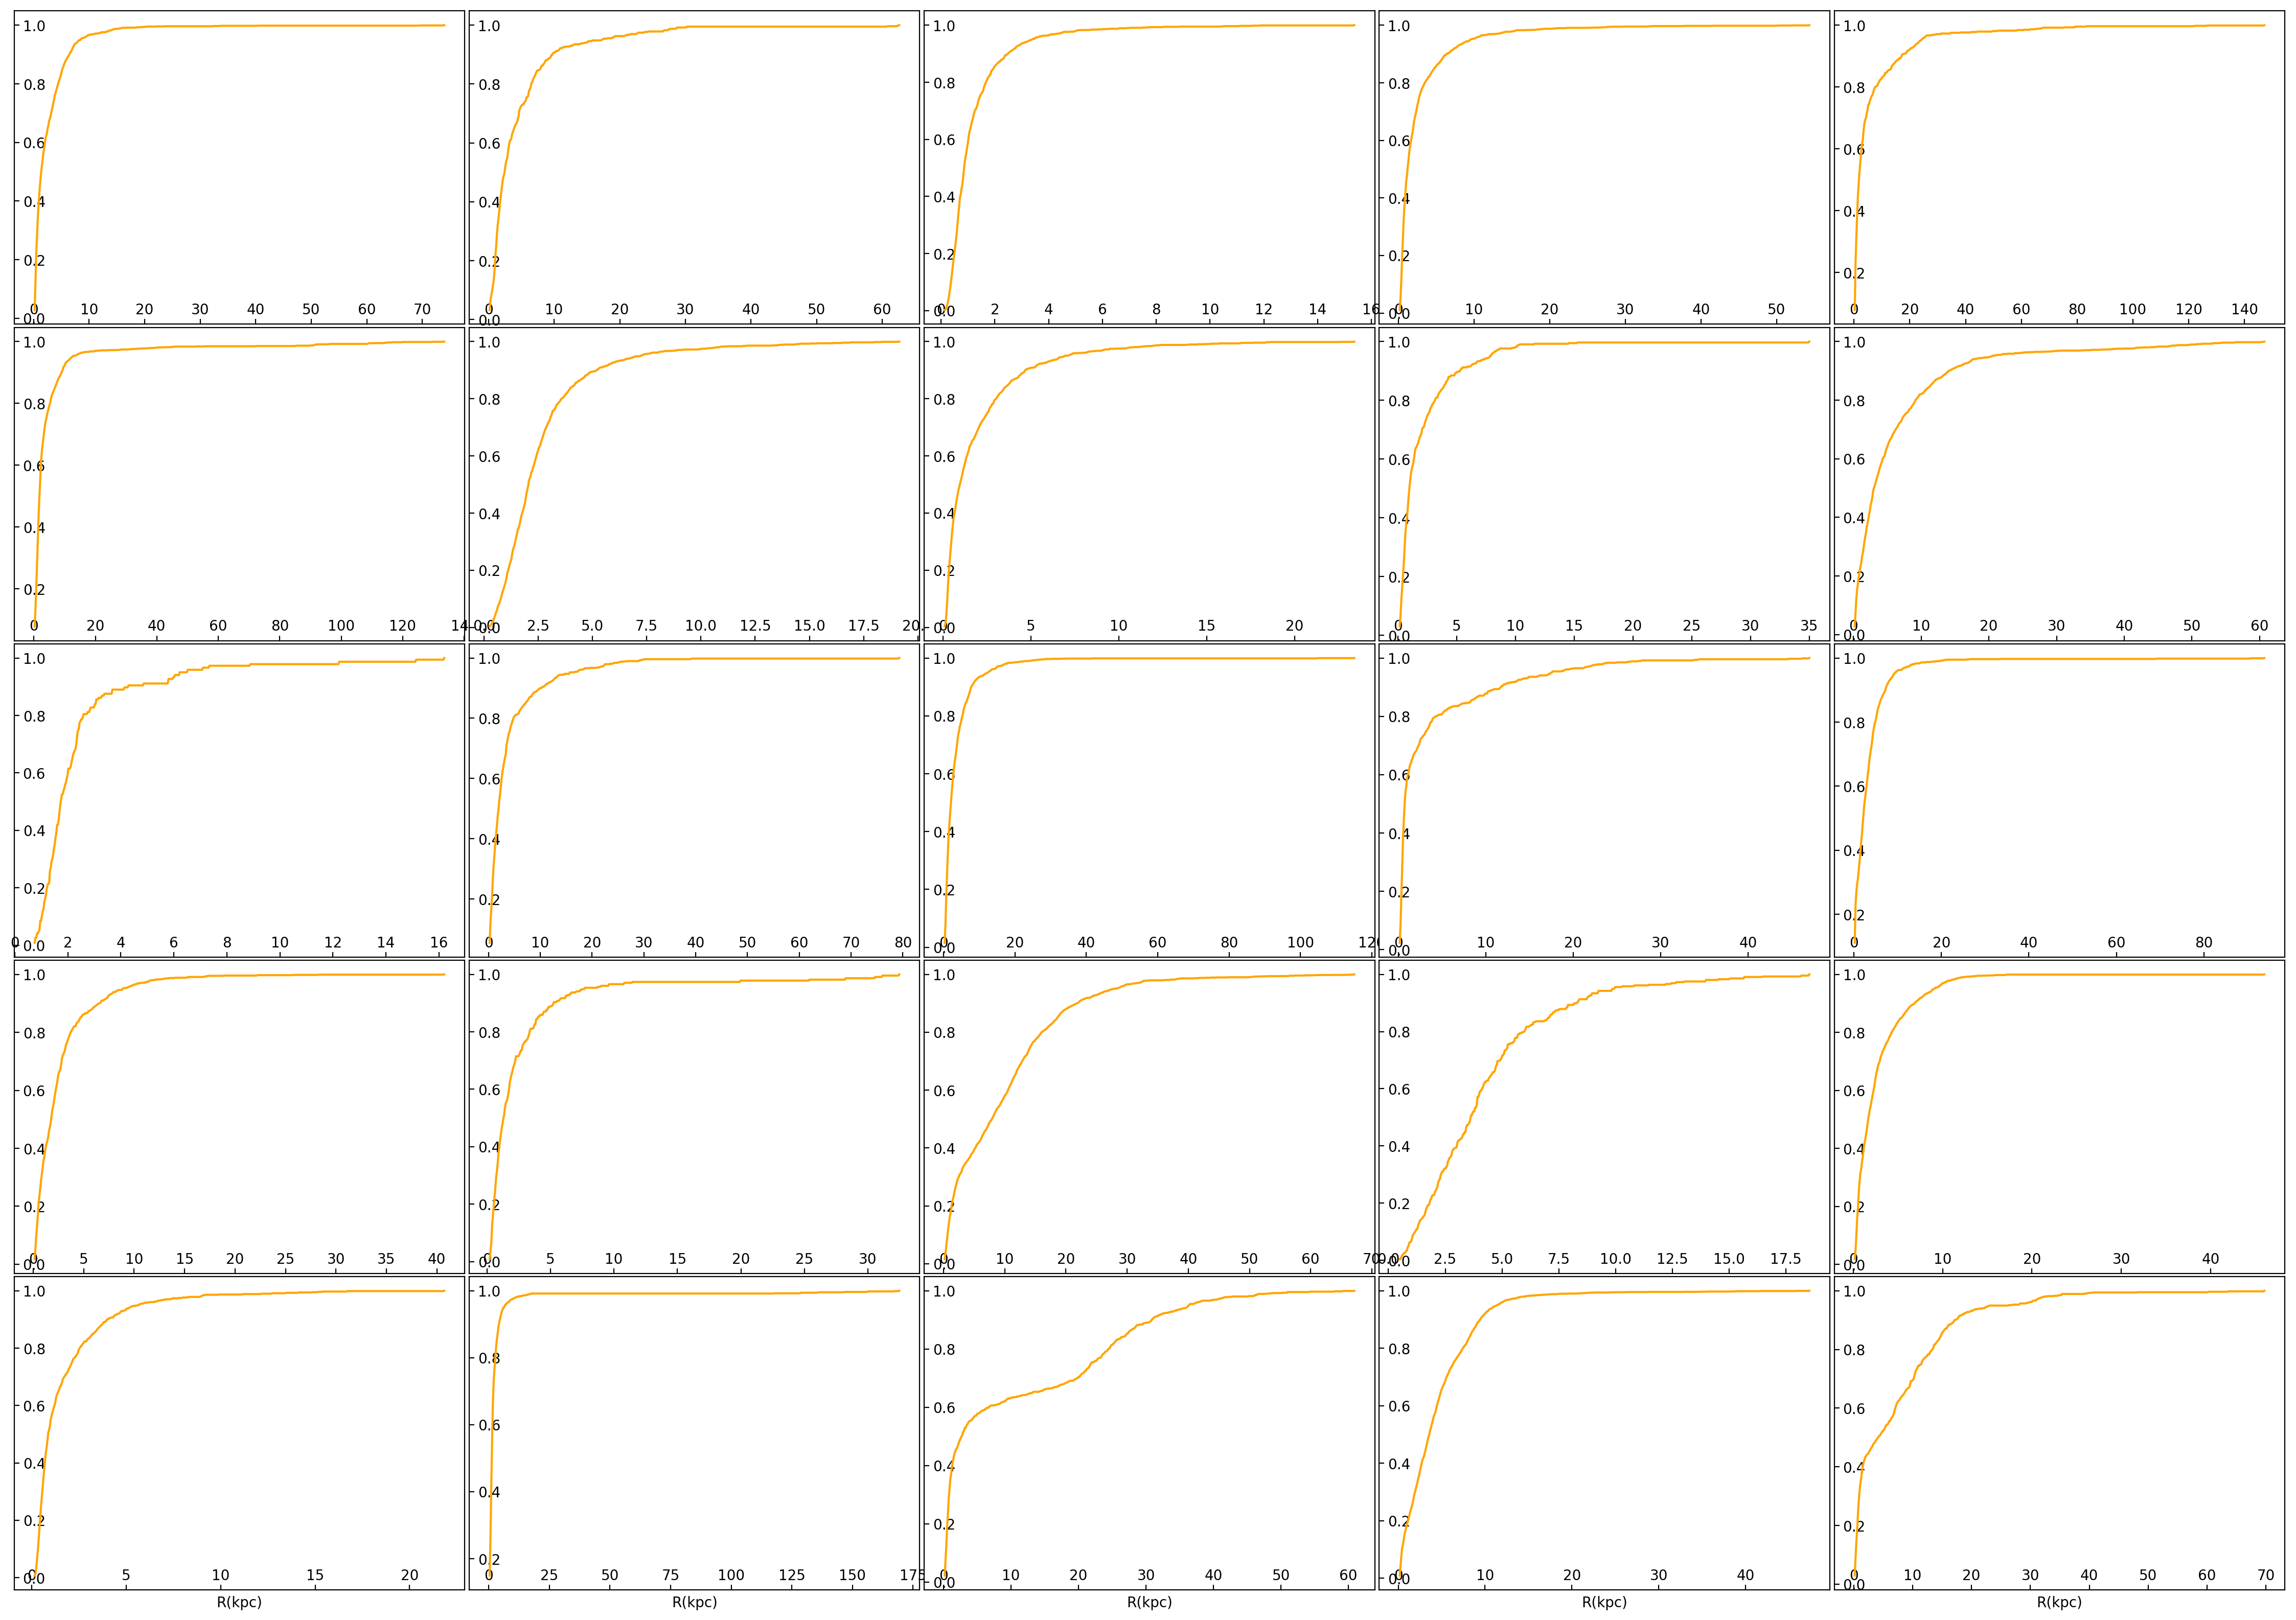

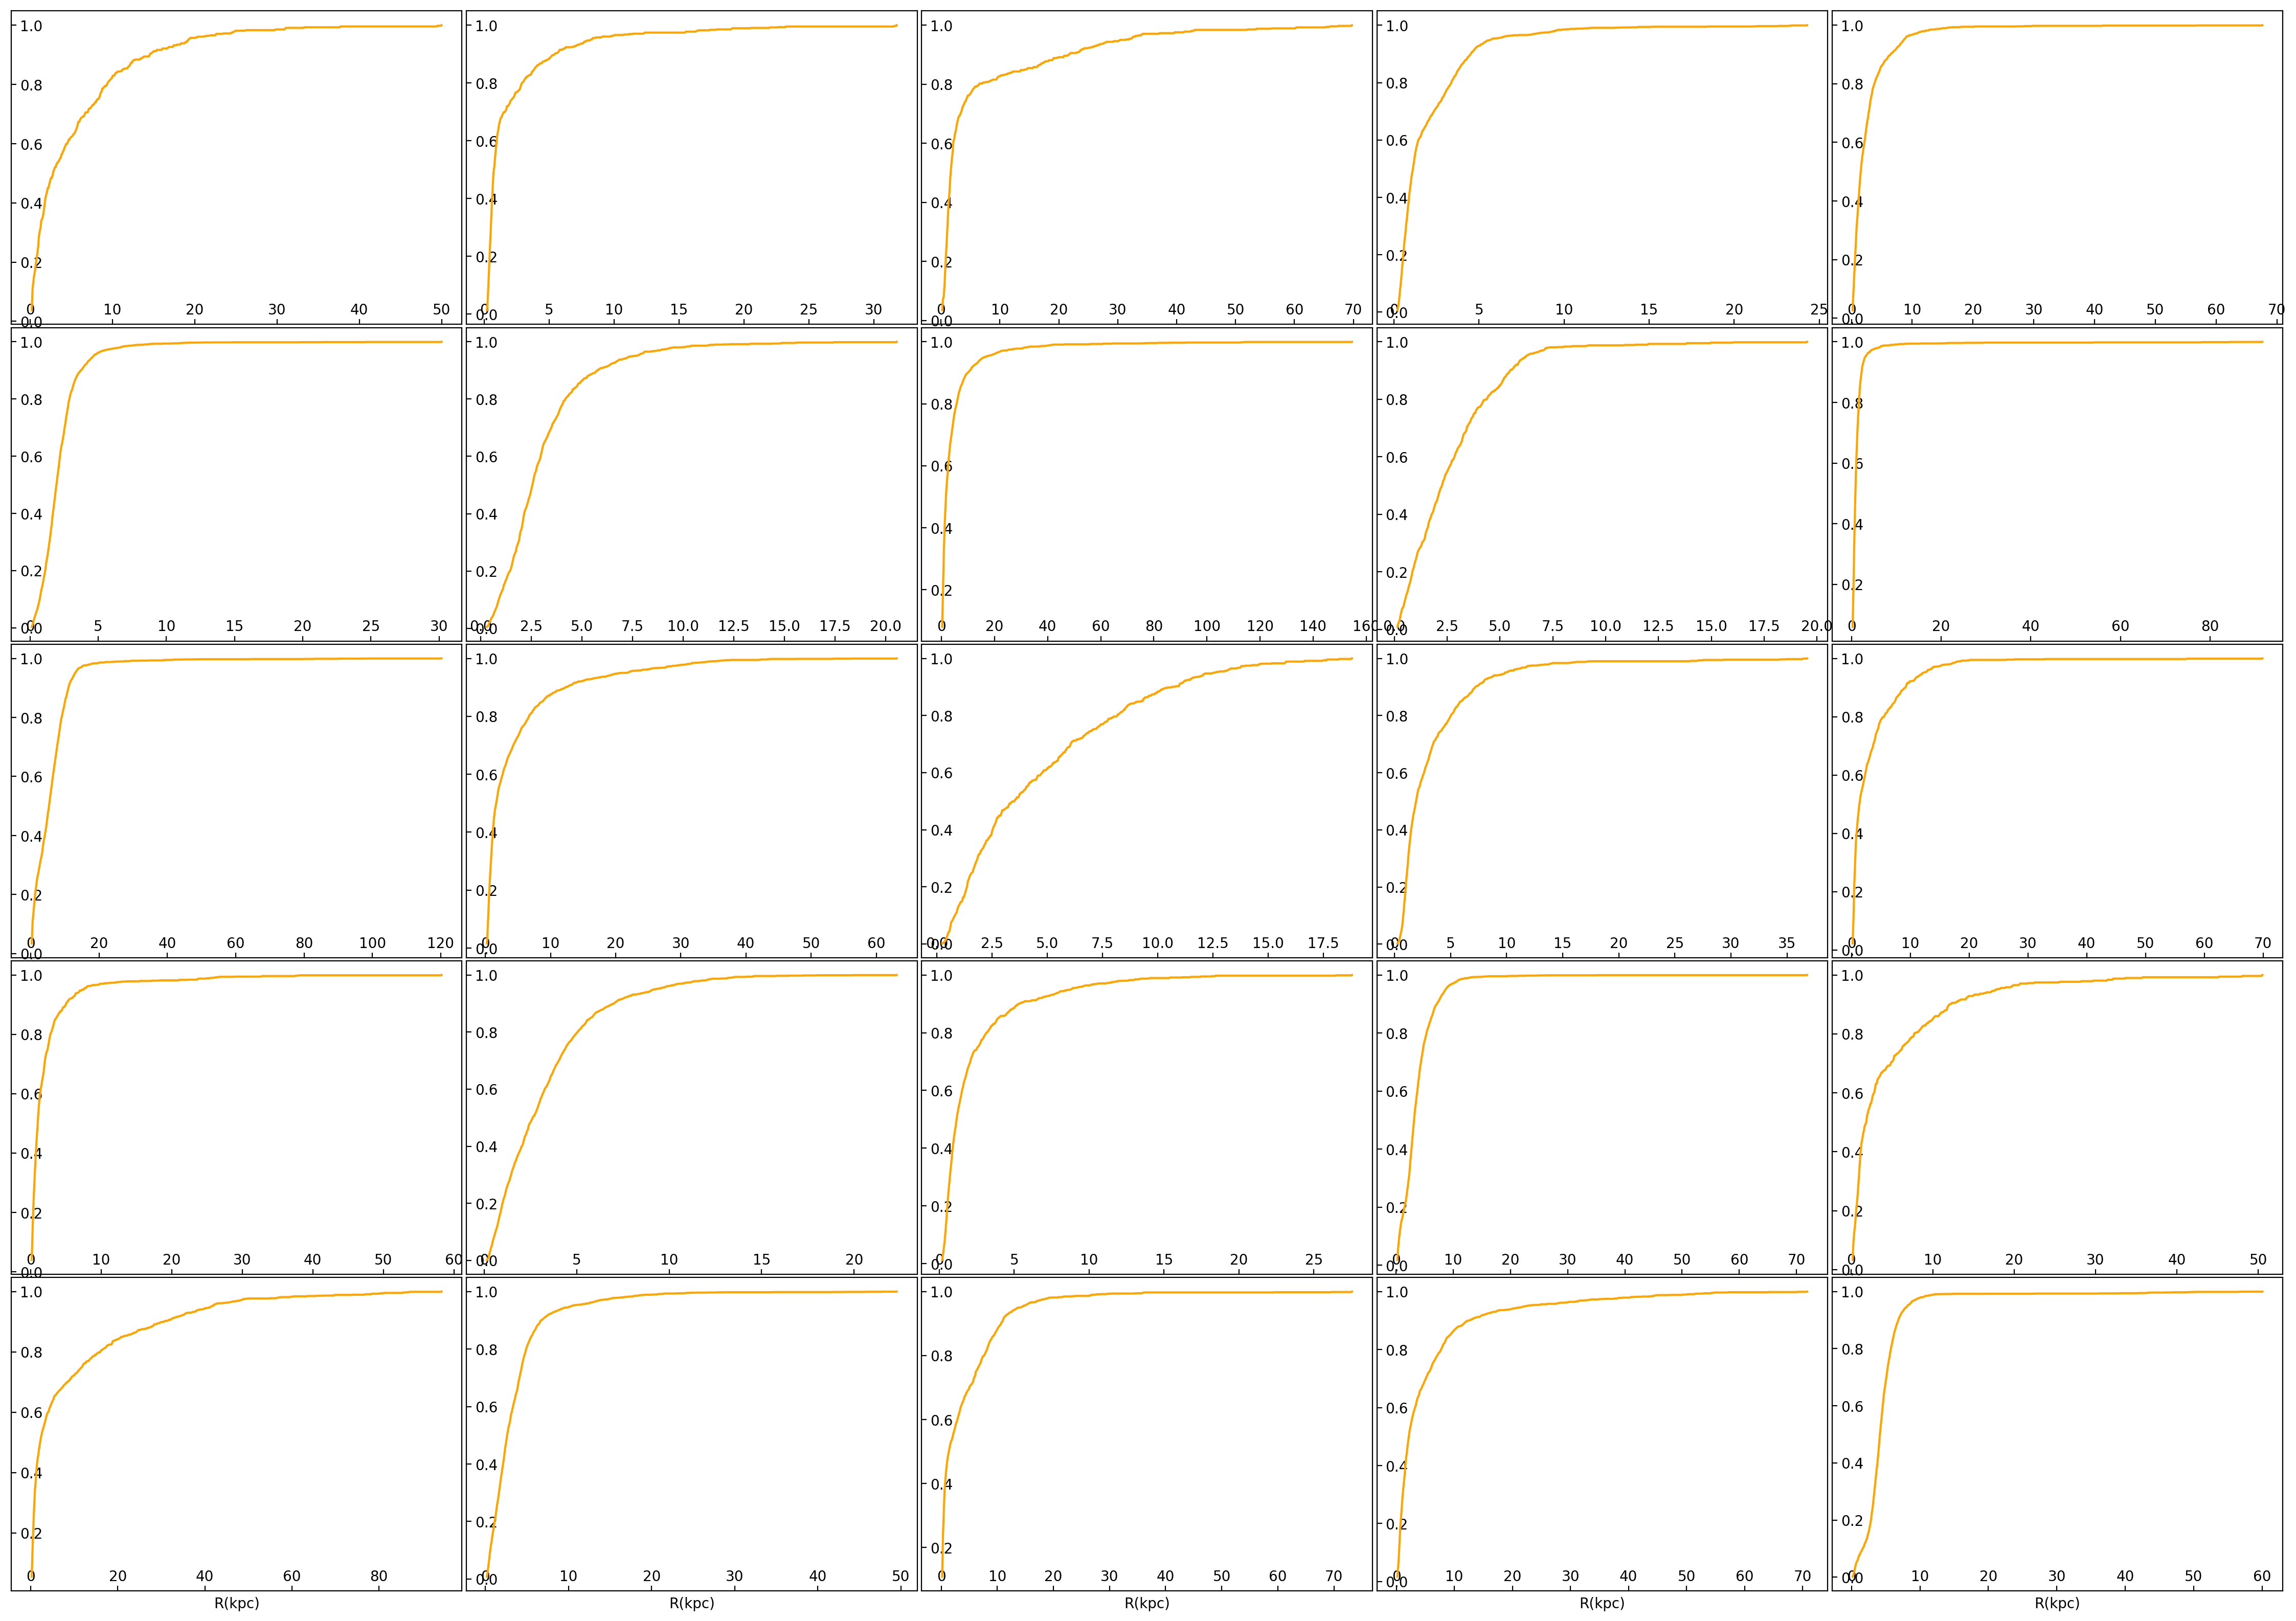

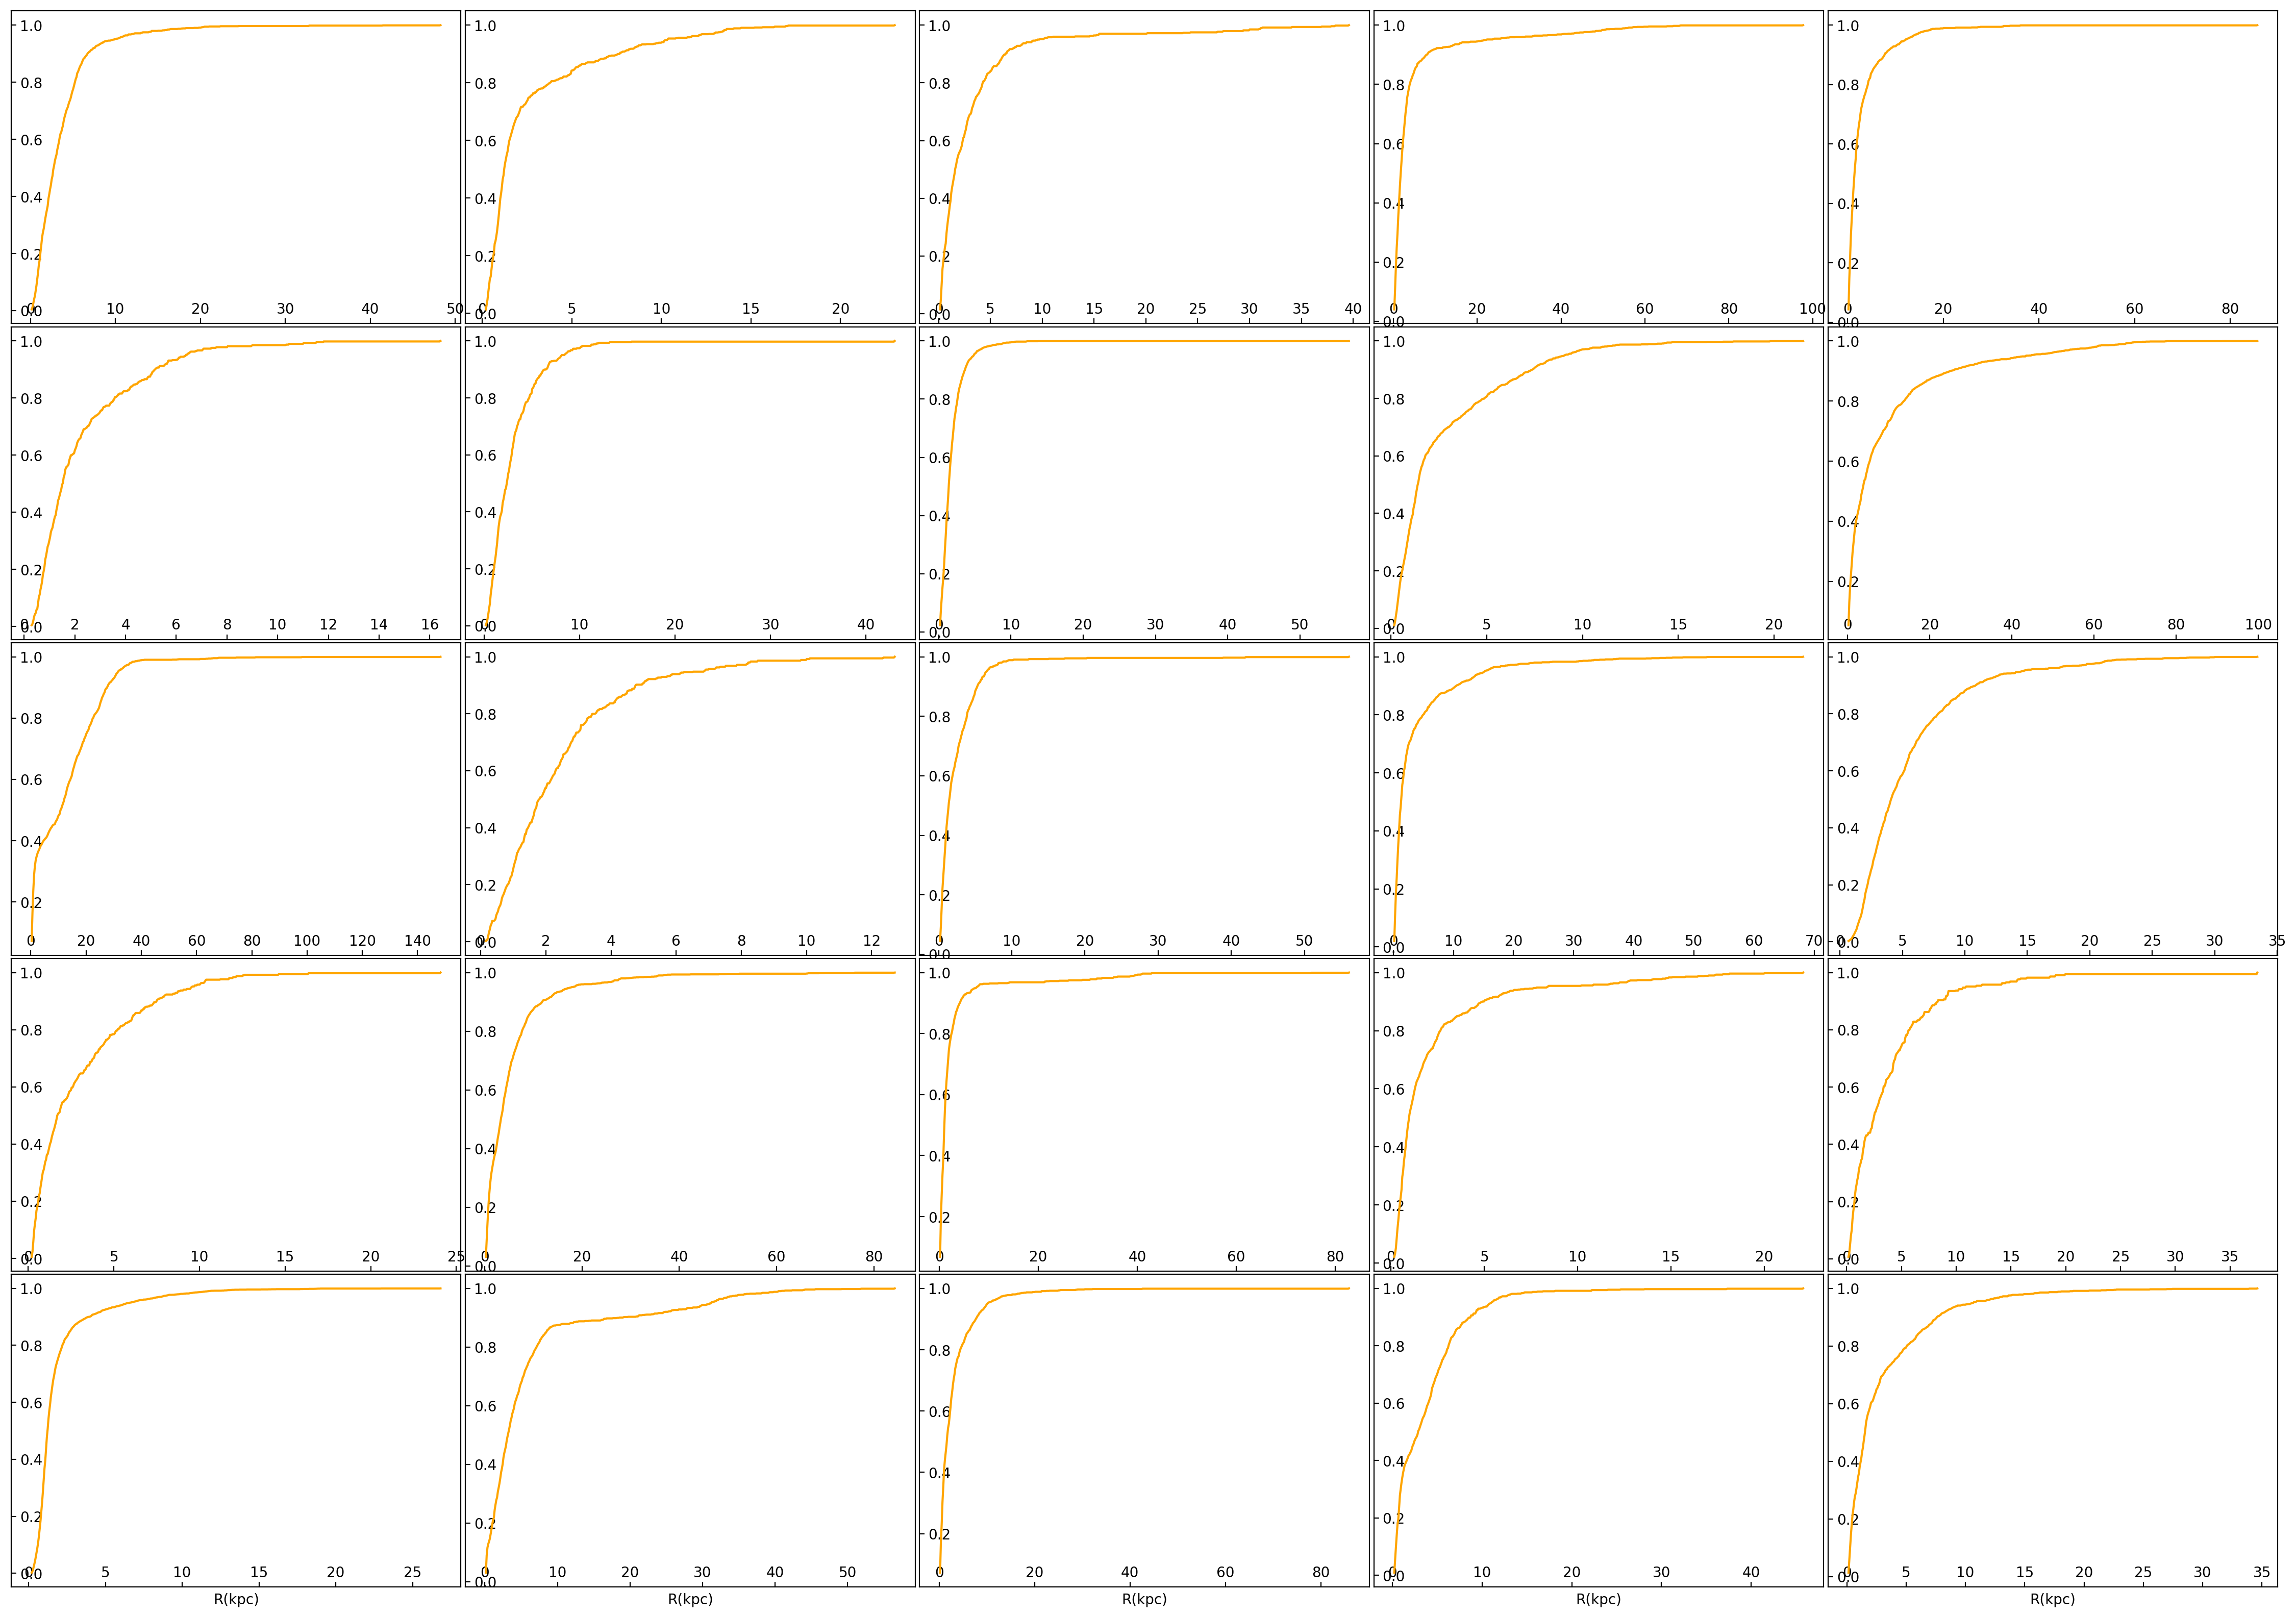

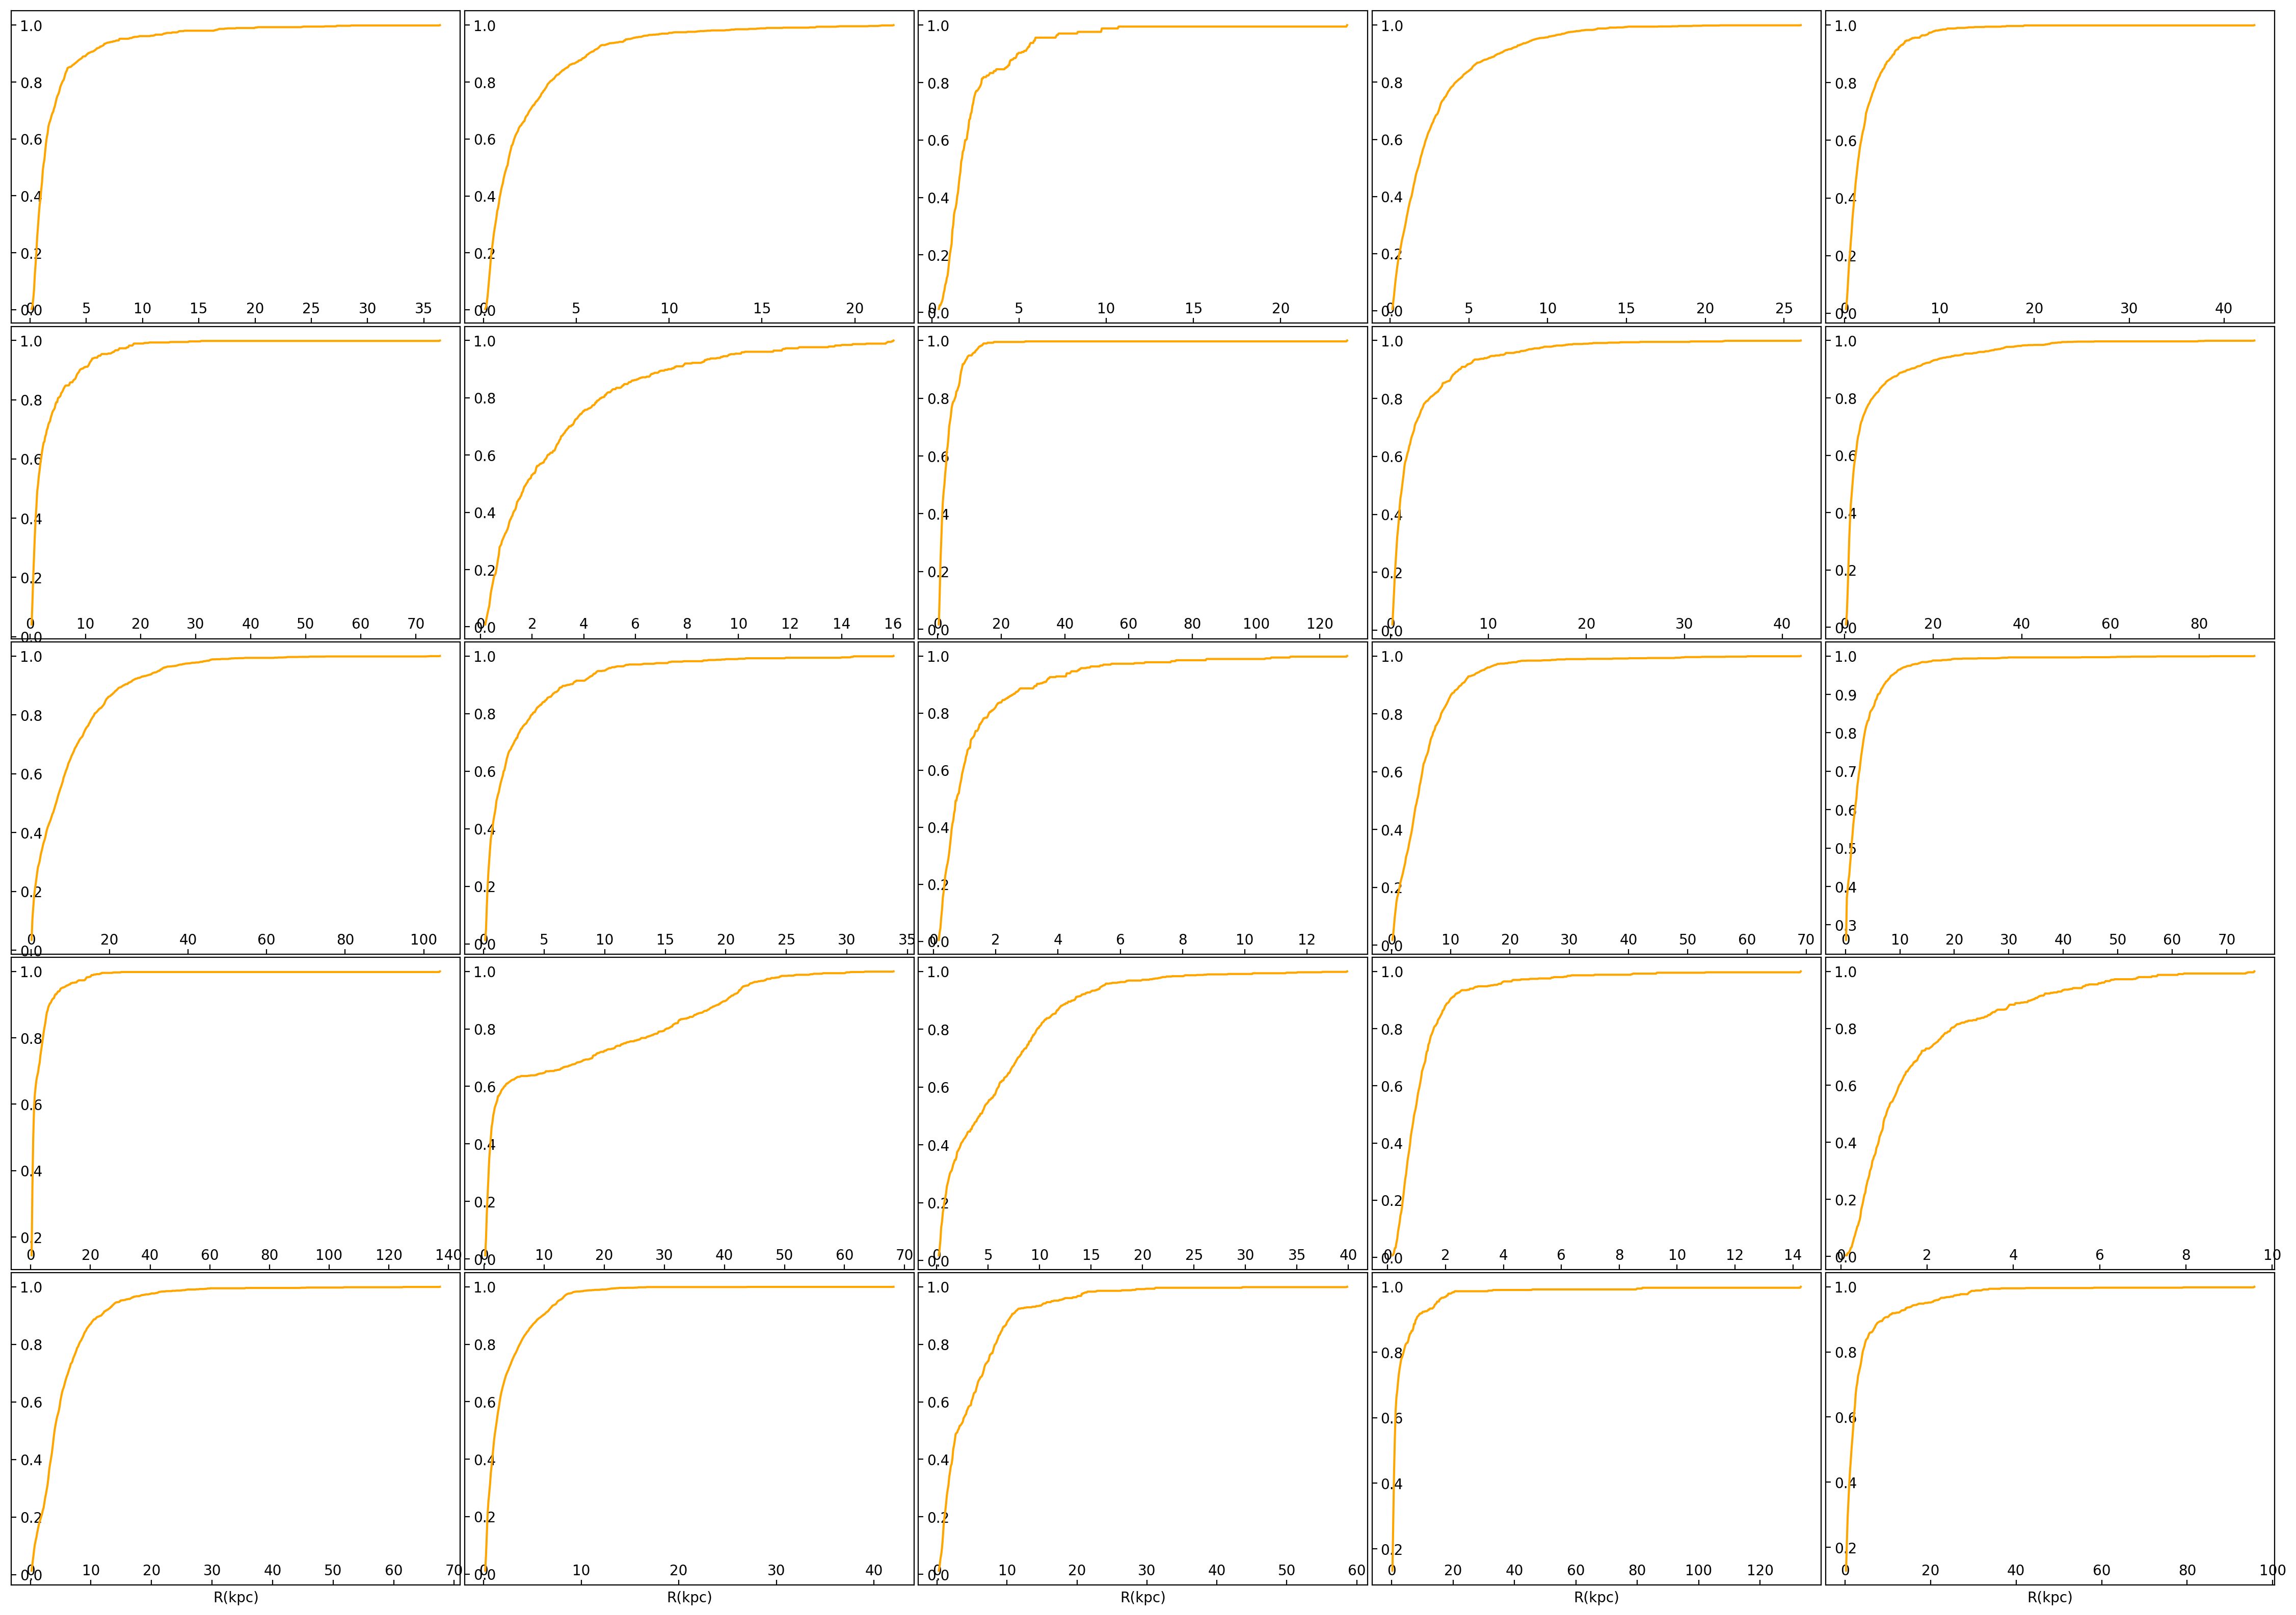

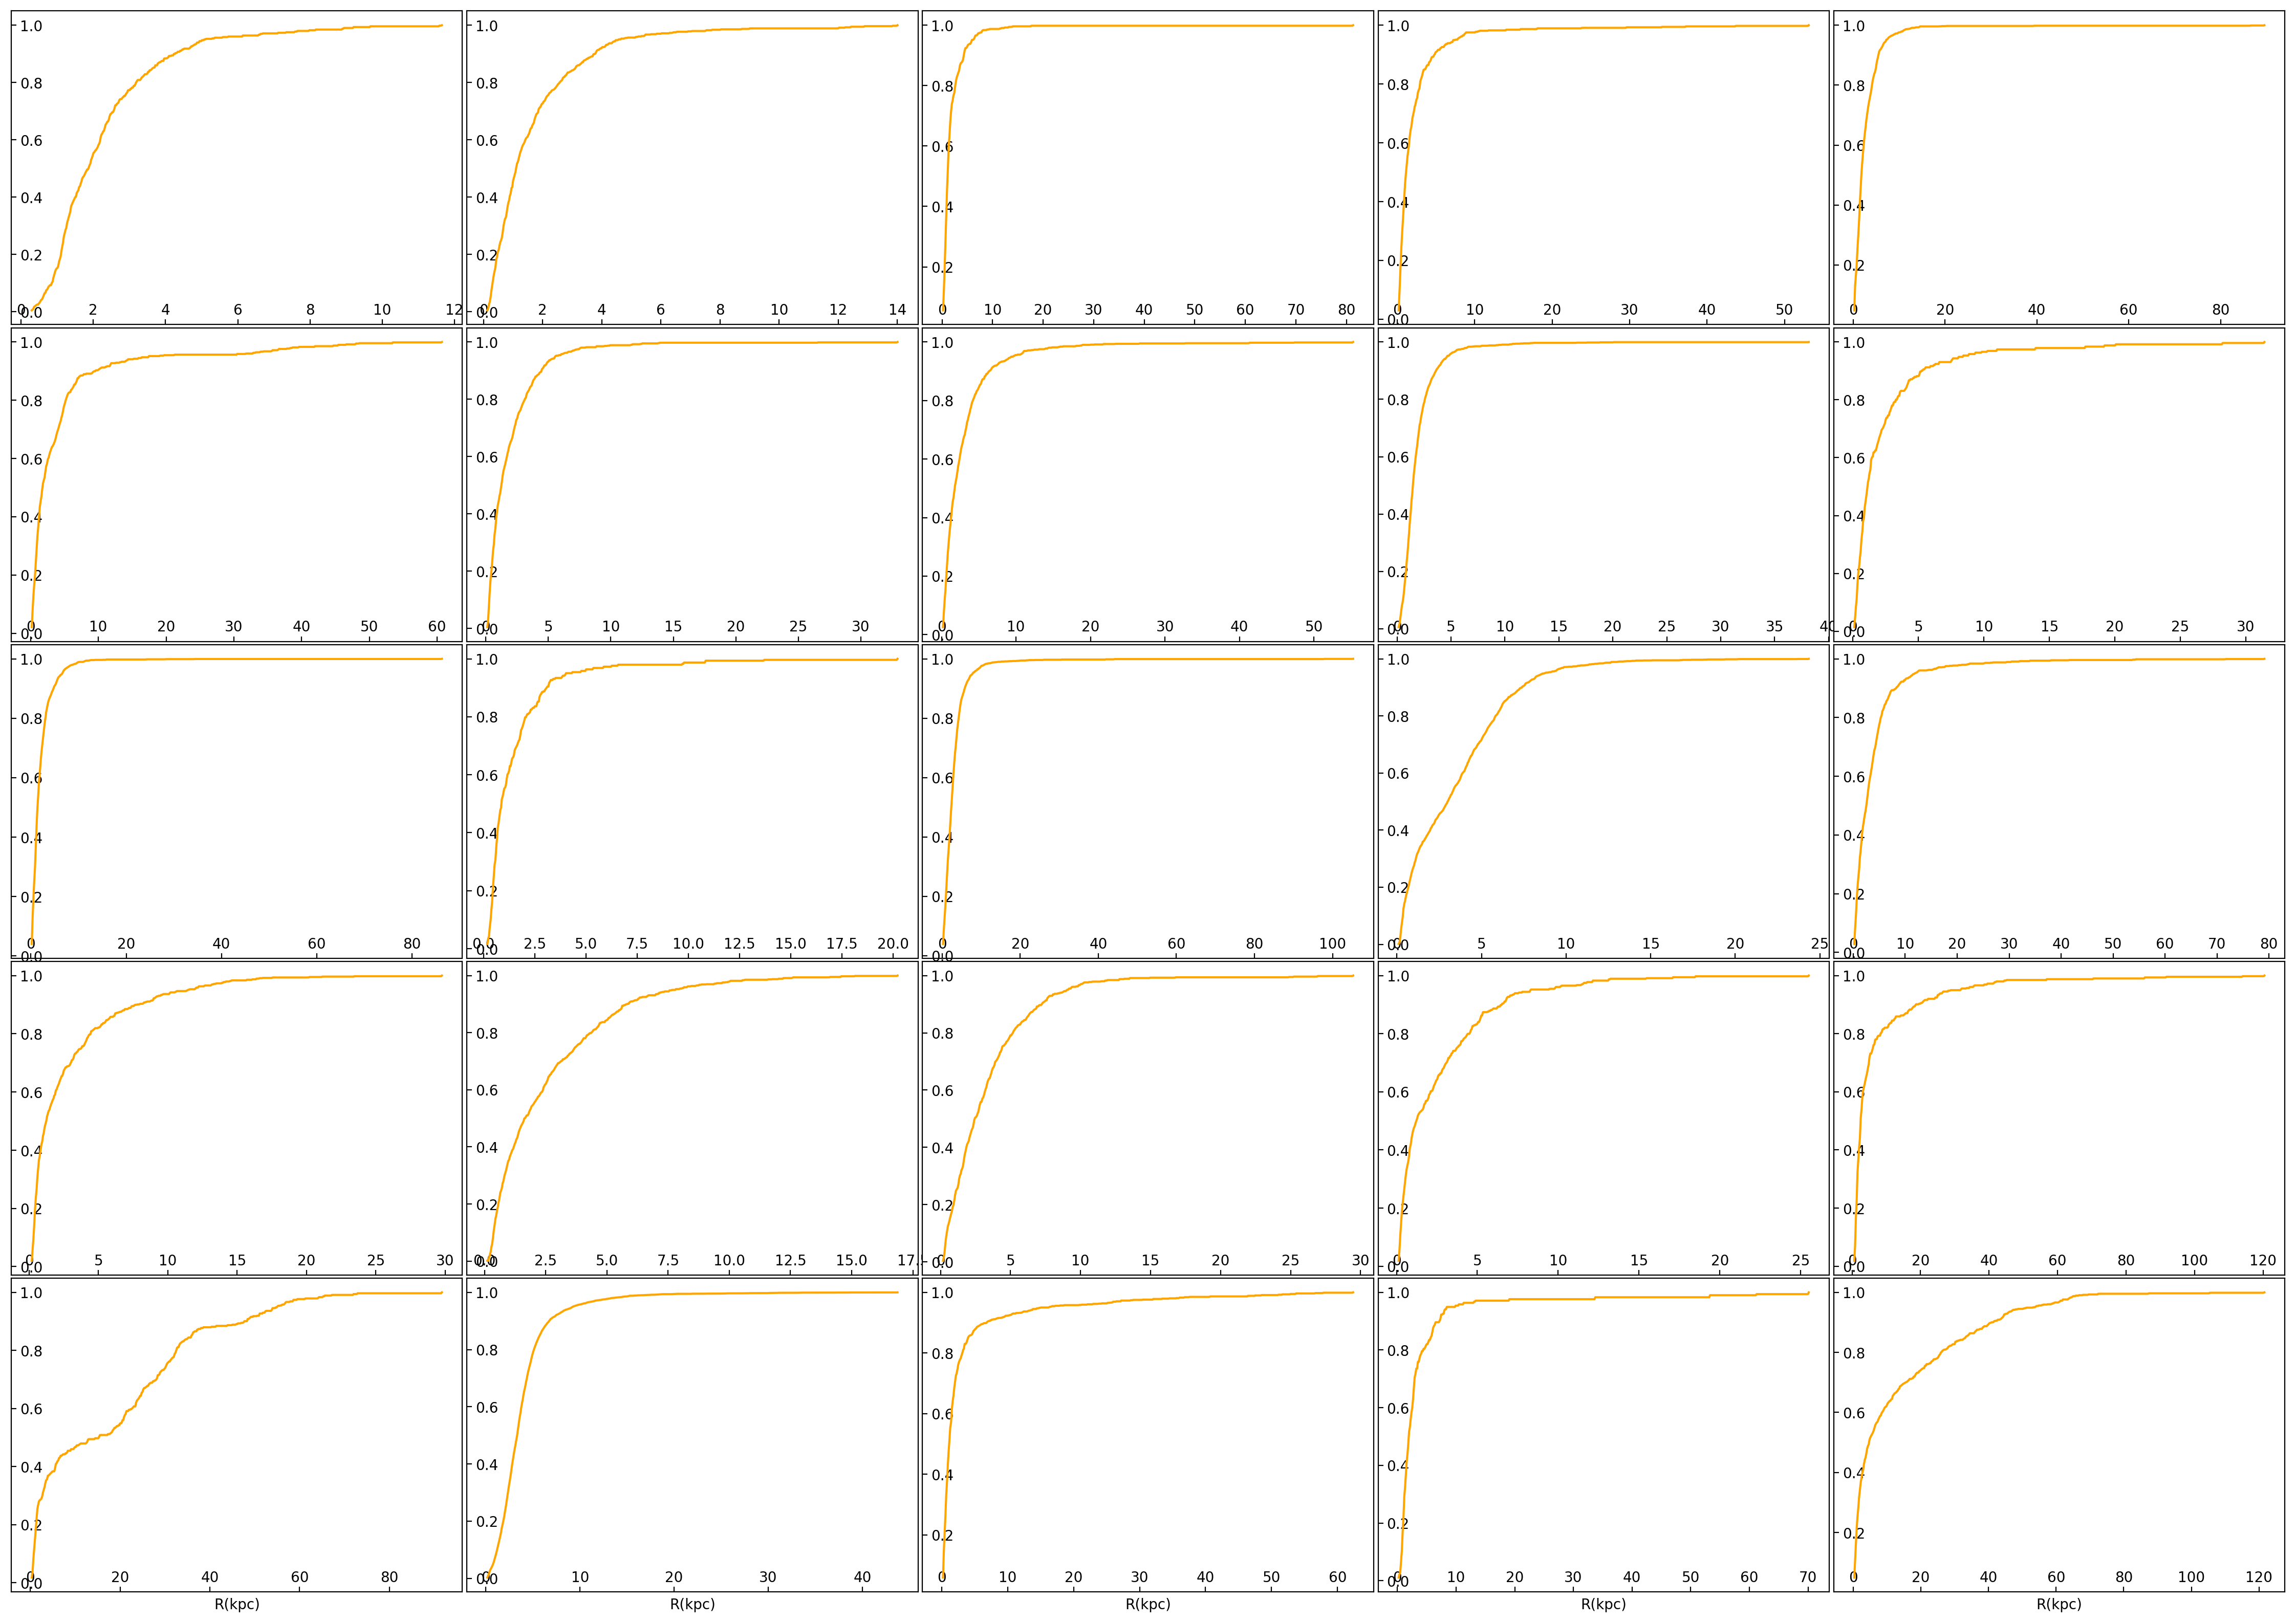

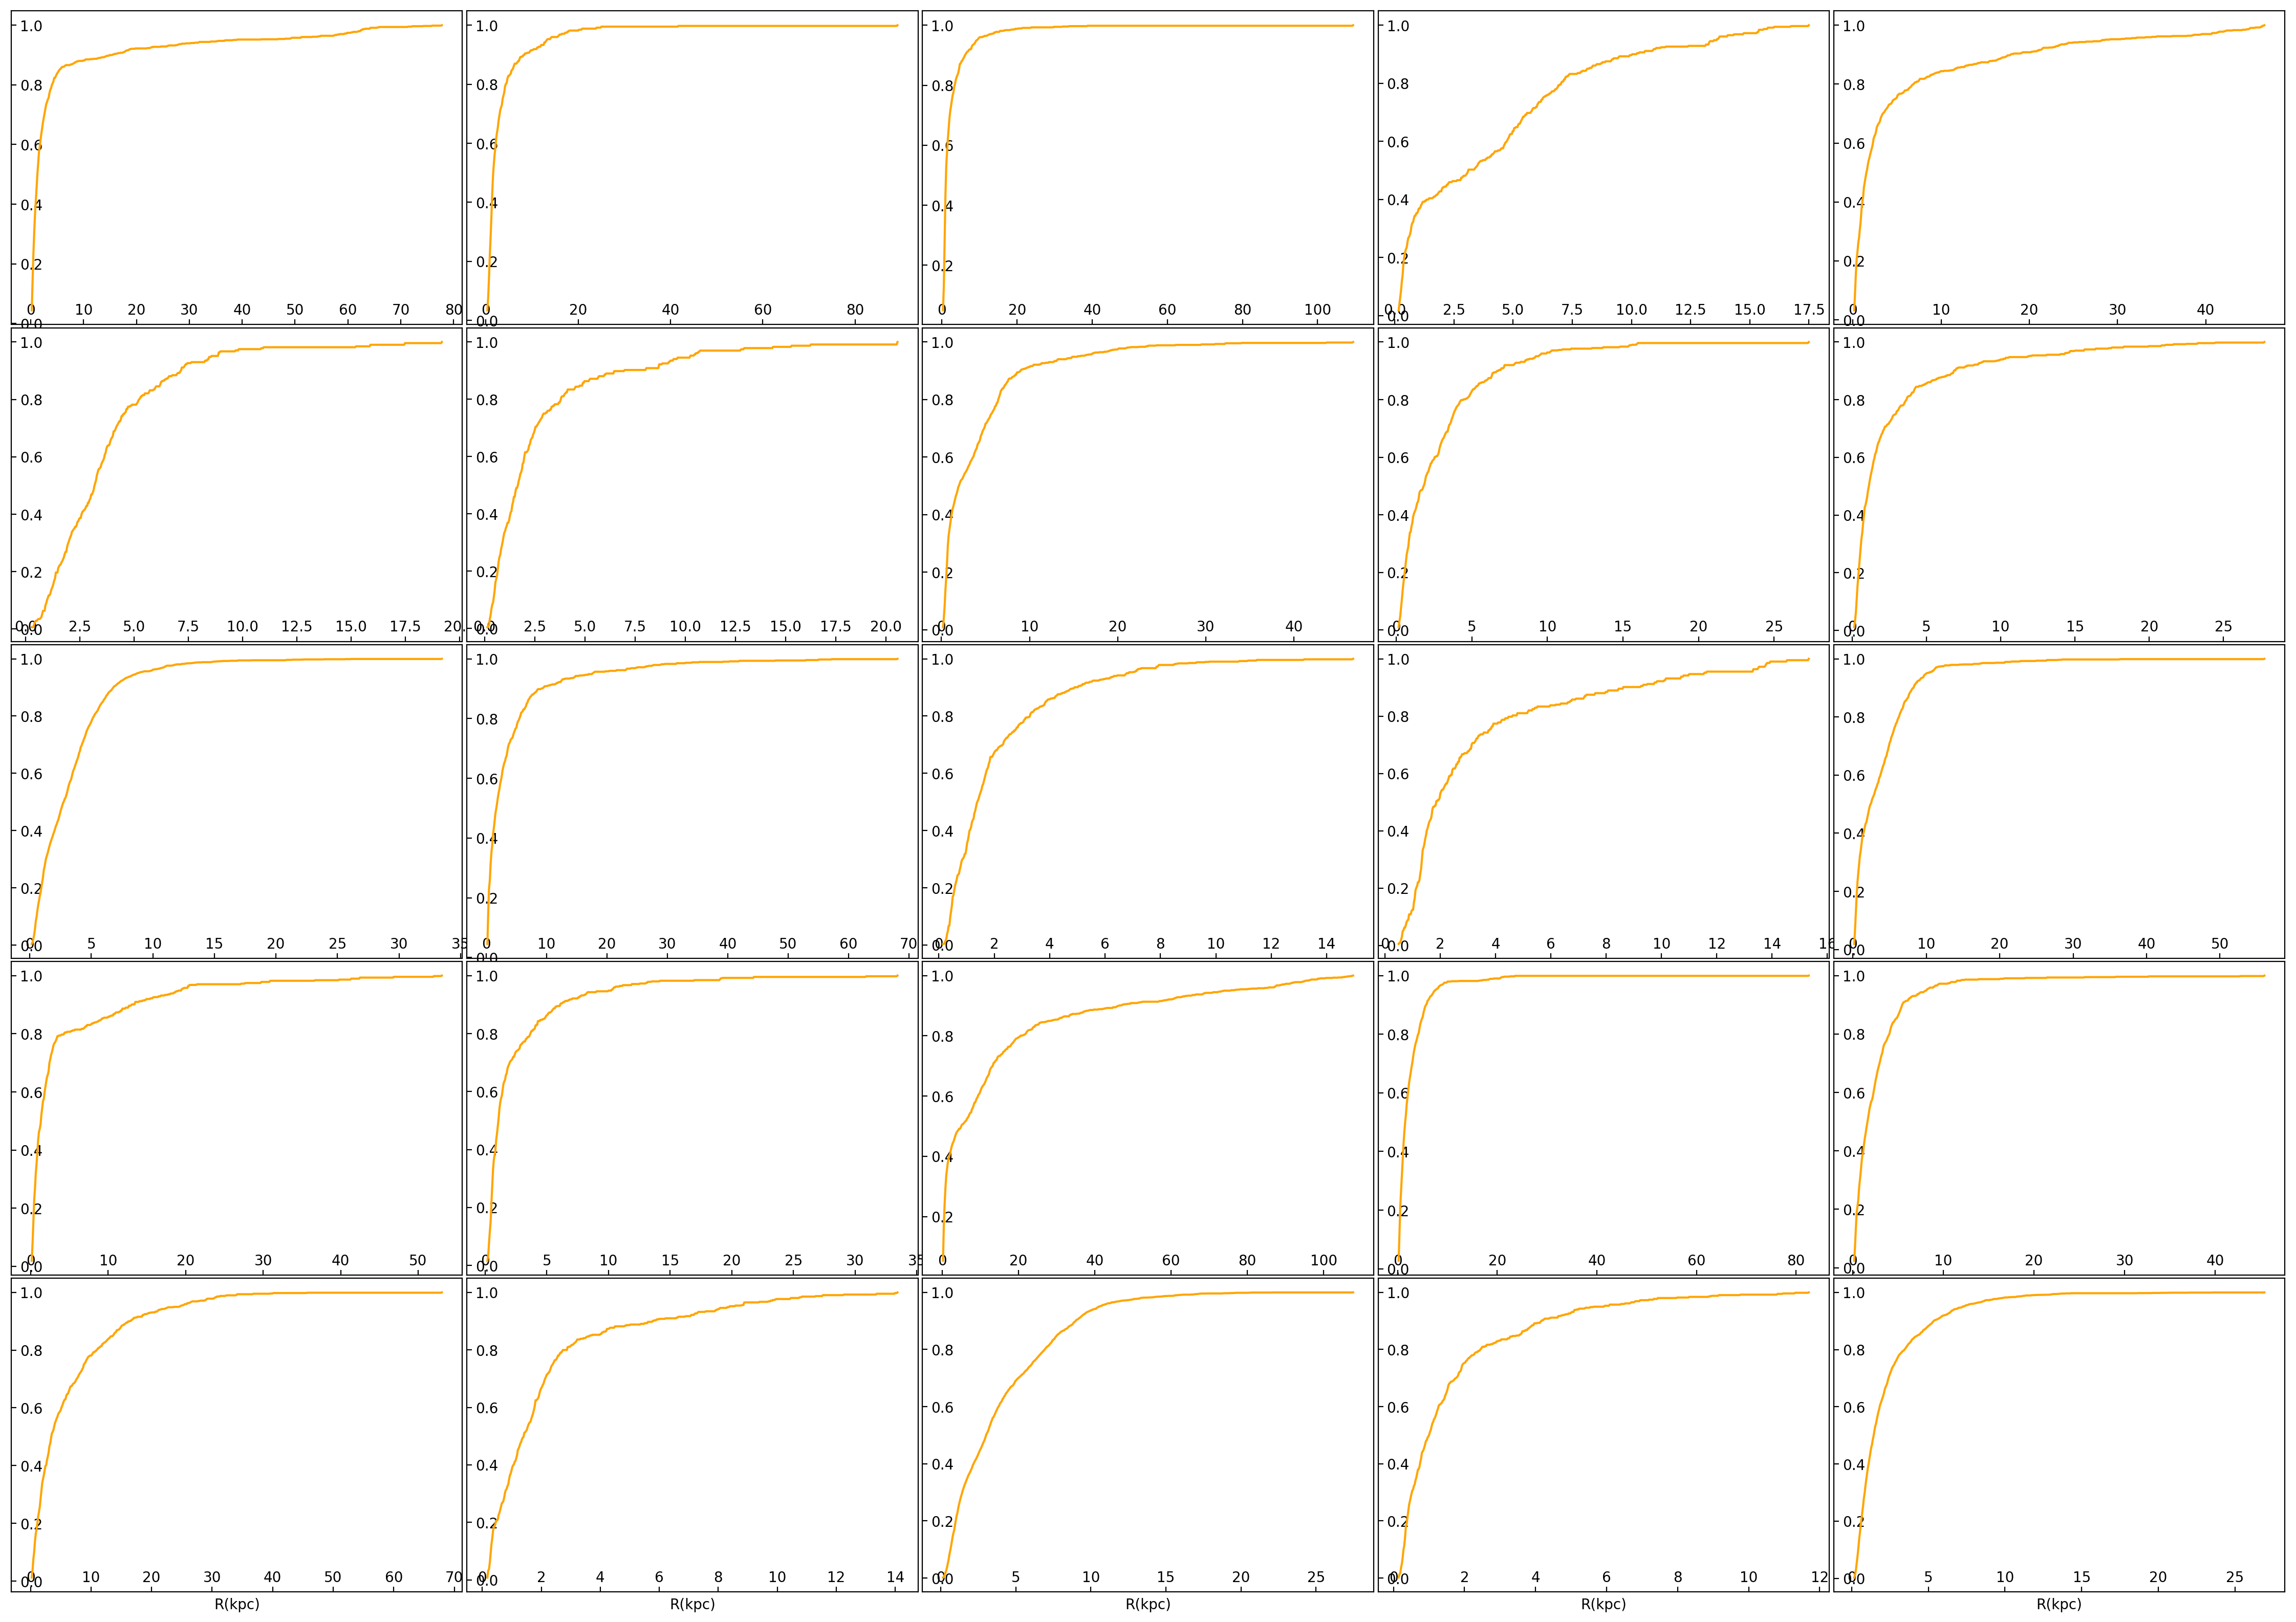

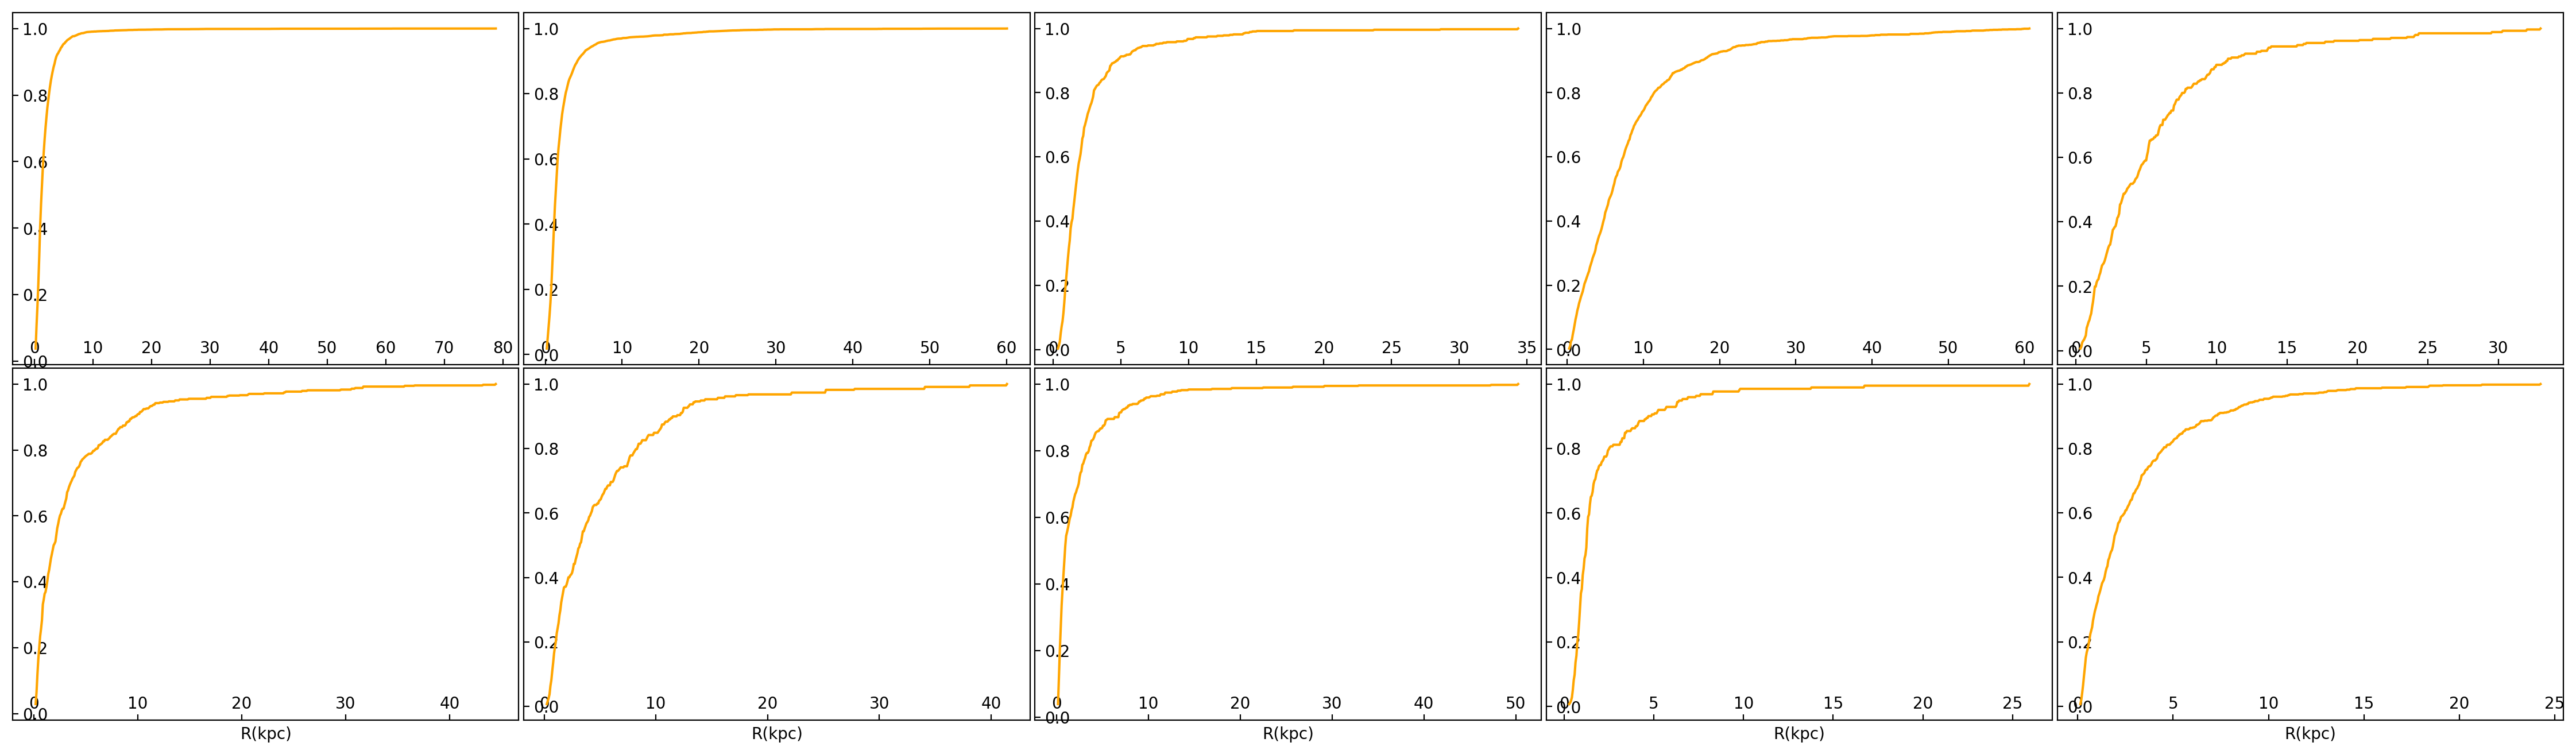

In [9]:
Classified_subhalos = np.genfromtxt('Classified_subhalos_TNG50-1.csv',skip_header=1,delimiter=',')

subhalo_rhalf = {}
subhalo_rhalf['SubhaloID'] = Classified_subhalos[:,1]
subhalo_rhalf['R200'] = Classified_subhalos[:,3]
rhalf_list = []

for start in tqdm(range(0,251,25)):
    inicio = start
    step = 20
    index = inicio

    Subhalos_ids = Classified_subhalos[:,1]
    Subhalos_R200 = Classified_subhalos[:,3]
    circle = np.linspace(0, 2 * np.pi, 100)

    fig = plt.figure(figsize=(28.66, 20.46), dpi=200)
    outer = gridspec.GridSpec(5, 5, wspace=0.01, hspace=0.01)

    for i in range(25):
        if index == 260:
            break
        subhaloid = Subhalos_ids[index]
        R200 = Subhalos_R200[index]
        subhalo_df = pd.read_csv('subhalo_tables_extras/subhalo%s_counterrotatingdisk.csv'%subhaloid)
        particle_count = len(subhalo_df['x'])



        inner = gridspec.GridSpecFromSubplotSpec(5, 1,
                        subplot_spec=outer[i], wspace=0.1, hspace=0.1)



        ax = plt.Subplot(fig, inner[0:5])
        A = ax.hist(subhalo_df['R'],weights=subhalo_df['M'],bins=512,cumulative=True,density=True,zorder=10)
        ax.clear()

        histogram_centre = ((A[1][:len(A[1])-1]+A[1][1:])/2)
        histogram_height = A[0]

        ax.plot(histogram_centre,histogram_height,label='Subhalo %s'%subhaloid,color='orange')
        ax.text(0.5,0.5,'Subhalo %s'%int(subhaloid), transform=ax.transAxes, color='white', ha='left', va='top')
        ax.tick_params(axis="y",direction="in", pad=-22)
        ax.tick_params(axis="x",direction="in", pad=-15)

        where_index = np.where( histogram_height >= 0.5 )
        rhalf_possibles = histogram_centre[where_index]
        rhalf = rhalf_possibles[0]
        rhalf_list.append(rhalf)

#         t = ax.text(0.3*rhalf,0.3, 'Subhalo %s'%subhaloid, color='black', zorder=20)
#         t.set_ha('center')
#         t2 = ax.text(0.3*rhalf,0.8, 'Particulas: %s'%particle_count, color='black', zorder=20)
#         t2.set_ha('center')
    #     ax.set_xticks(range(int(-0.5*R200),int(0.5*R200),step))
    #     ax.set_yticks(range(int(-0.5*R200),int(0.5*R200),step))
        ax.set_xlabel('R(kpc)')
        fig.add_subplot(ax)



        index += 1

    fig.savefig('subhalo_images/Subhalos_counterrotating_massdistribution_%s.png'%inicio,transparent=True)
    print('subhalo_images/Subhalos_counterrotating_massdistribution_%s.png'%inicio)

subhalo_rhalf['Rhalf'] = np.array(rhalf_list)

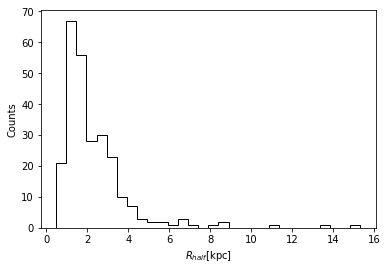

In [10]:
plt.hist(subhalo_rhalf['Rhalf'],bins=30,color='black',histtype='step')
plt.xlabel('$R_{half}$[kpc]')
plt.ylabel('Counts')
plt.savefig('R_half distribution.pdf',dpi=100)

In [11]:
len(subhalo_rhalf['Rhalf'])

260

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


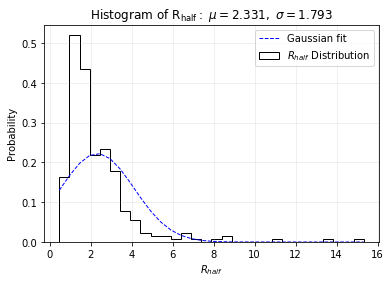

In [13]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

datos = subhalo_rhalf['Rhalf']

# best fit of data
(mu, sigma) = norm.fit(datos)

# the histogram of the data
n, bins, patches = plt.hist(datos,bins=30,color='black',histtype='step', normed=1, label='$R_{half}$ Distribution')

# add a 'best fit' line
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'b--', linewidth=1, label='Gaussian fit')

#plot
plt.xlabel('$R_{half}$')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ R_{half}:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True,alpha=0.251)
plt.legend()
plt.savefig('imagenes/R_half_fit.pdf',dpi=100)

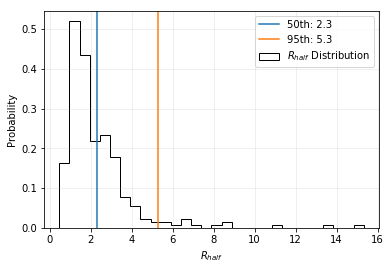

In [14]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

# define the normal distribution and PDF
dist = sps.norm(loc=mu, scale=sigma)
x = np.linspace(dist.ppf(.001), dist.ppf(.999))
y = dist.pdf(x)

# calculate PPFs
ppfs = {}
for ppf in [.5, .95]:
    p = dist.ppf(ppf)
    ppfs.update({ppf*100: p})

# plot results
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(datos,bins=30,color='black',histtype='step', normed=1, label='$R_{half}$ Distribution')
#ax.plot(x, y, 'b--', linewidth=1, label='Gaussian fit')
for i, ppf in enumerate(ppfs):
    ax.axvline(ppfs[ppf], color=f'C{i}', label=f'{ppf:.0f}th: {ppfs[ppf]:.1f}')
ax.legend()
plt.ylabel('Probability')
plt.xlabel('$R_{half}$')
plt.grid(True, alpha=0.25)
plt.savefig('imagenes/R_half_percentiles.pdf',dpi=100)

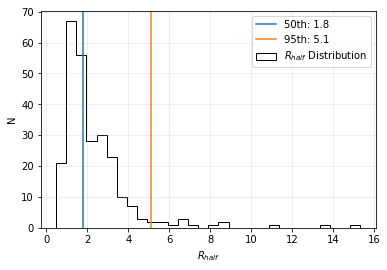

In [51]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

percentile = {}
percentiles = [50,95]
for number in percentiles:
    percentile[number] = np.percentile(datos,number)

# plot results
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(datos,bins=30,color='black',histtype='step', normed=0, label='$R_{half}$ Distribution')

for i,perc in enumerate(percentile):
    ax.axvline(percentile[perc], color=f'C{i}', label=f'{perc:.0f}th: {percentile[perc]:.1f}')

ax.legend()
plt.ylabel('N')
plt.xlabel('$R_{half}$')
plt.grid(True, alpha=0.25)
plt.savefig('imagenes/R_half_percentiles.pdf',dpi=100)

In [ ]:
ppfs

In [44]:
#Filtering according to 95th percentile of Rhalf>=5.1

percentile_filter = 5.1
indices_filtrados = np.where(subhalo_rhalf['Rhalf'] >= percentile_filter)
subhalo_counter_95 = {}
subhalo_counter_95['Rhalf'] = subhalo_rhalf['Rhalf'][indices_filtrados]
subhalo_counter_95['R200'] = subhalo_rhalf['R200'][indices_filtrados]
subhalo_counter_95['SubhaloID'] = subhalo_rhalf['SubhaloID'][indices_filtrados]
subhalo_counter_95

{'Rhalf': array([  6.54154411,   7.10137126,   8.63216802,   6.52793155,
         13.61769977,   5.4637276 ,   8.49448295,   7.91505593,
          5.43804554,  11.00610386,   6.50296599,  15.31943139,   6.05585346]),
 'R200': array([ 179.21212769,  167.076828  ,  169.57954407,  146.69950867,
         140.94436646,  119.15261841,  123.67668915,  120.26761627,
         119.03757477,  111.41501617,  108.23468781,  101.64916229,
          97.0650177 ]),
 'SubhaloID': array([ 455291.,  478216.,  501208.,  531910.,  547844.,  570319.,
         571633.,  582137.,  589496.,  598112.,  606820.,  619381.,  628949.])}

In [45]:
print('Subhalos con componente contrarotante del 5% mas extenso',list(subhalo_counter_95['SubhaloID']))

Subhalos con componente contrarotante del 5% mas extenso [455291.0, 478216.0, 501208.0, 531910.0, 547844.0, 570319.0, 571633.0, 582137.0, 589496.0, 598112.0, 606820.0, 619381.0, 628949.0]


In [46]:
contrarotantes_extensos = list(subhalo_counter_95['SubhaloID'])

In [47]:
len(contrarotantes_extensos)

13

In [48]:
contrarotantes_extensos[0]

455291.0

In [50]:
#Analicemos la masa contrarotante de 1 subhalo con componente contrarotante extensa


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import illustris_python as il
import h5py
import pandas as pd
from tqdm.notebook import tqdm#barrita
#importar funciones de circularidad
from circularity import spherical_coords_from_vector             #formato: spherical_coords_from_vector(vector)
from circularity import matrix_from_spherical                    #formato: matrix_from_spherical(r,theta,phi)
from circularity import inertia_tensor                           #formato: inertia_tensor(Masas, Coordenadas, Centralpos)
from circularity import diagonalization_of_inertia               #formato: diagonalization_of_inertia(I)
from circularity import star_particles_rotated_once_eulermethod  #formato: star_particles_rotated_once_eulermethod(subhaloid, snapshotnum, basepath,radius_limit,minmetal,maxmetal)
from circularity import star_particles_rotated_once              #formato: star_particles_rotated_once(subhaloid, snapshotnum, basepath,radius_limit,minmetal,maxmetal)
from circularity import circularities_eulermethod                #formato: circularities_eulermethod(subhaloID,snapNum,basepath,radius_limit,metallicity_cutoff,radius_limit_rotation,minmetal_rotation,maxmetal_rotation)
from circularity import circularities_diagmethod                 #formato: circularities_diagmethod(subhaloID,snapNum,basepath,radius_limit,metallicity_cutoff,radius_limit_rotation,minmetal_rotation,maxmetal_rotation)



In [51]:


#(ID, MASS, R200)
#(394621, 3.4533272e+12, 228.1541748046875)
#(402555, 2.9701266e+12, 197.39179992675781)
#(436932, 2.7373569e+12, 199.83599853515625)
SubhaloID = contrarotantes_extensos[0]
Mass = 2.7373569e+12
R200 = 199.83599853515625

snapNum = 99
basepath = 'sims.TNG/TNG50-1/output'

stars = circularities_eulermethod(SubhaloID,snapNum,basepath,radius_limit=1.0*R200,minmetal=0.05,maxmetal=3.0,radius_limit_rotation=0.2*R200,minmetal_rotation=0.95,maxmetal_rotation=1.5)
star = star_particles_rotated_once_eulermethod(SubhaloID, snapNum, basepath,0.2*R200/0.667,0.95,1.5)


12.567434864
[[ -1.32155899e-08  -6.09163260e-08   7.86972331e+08]]
-----------------------
 [ -2.07658419e+08  -1.55259074e+08   2.57100200e+09]
12.567434864
[[ -1.73064062e-08  -8.80291614e-08   7.88226251e+08]]


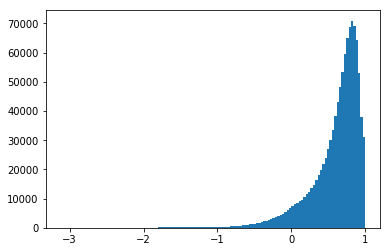

In [52]:
plt.hist(stars['Circularity'],bins=128)
plt.show()

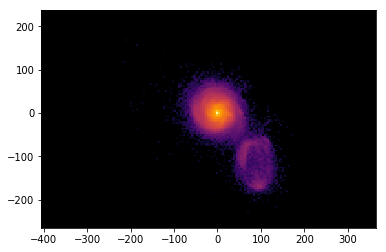

In [53]:
plt.hist2d(stars['Coordinates'][:,0],stars['Coordinates'][:,1],bins=128,cmap='inferno',norm=mpl.colors.LogNorm())
plt.axis('equal')
ax = plt.gca()
ax.set_facecolor('black')
plt.show()

In [54]:
len(np.where(stars['Circularity'] <= -0.7)[0])

9156

In [58]:
indices_contrarrotantes = np.where(stars['Circularity'] <= -0.7)[0]
stars.keys()

dict_keys(['count', 'Masses', 'Coordinates', 'Velocities', 'GFM_Metallicity', 'Potential', 'GFM_StellarFormationTime', 'Distance_to_center', 'Angular_Momentum', 'Specific_Energy', 'Circularity'])

In [62]:
counterrotating_particles = {}
counterrotating_particles['Masses'] = stars['Masses'][indices_contrarrotantes]
counterrotating_particles['Coordinates'] = stars['Coordinates'][indices_contrarrotantes]
counterrotating_particles['Velocities'] = stars['Velocities'][indices_contrarrotantes]
counterrotating_particles['Potential'] = stars['Potential'][indices_contrarrotantes]
counterrotating_particles['GFM_StellarFormationTime'] = stars['GFM_StellarFormationTime'][indices_contrarrotantes]
counterrotating_particles['Distance_to_center'] = stars['Distance_to_center'][indices_contrarrotantes]
counterrotating_particles['Angular_Momentum'] = stars['Angular_Momentum'][indices_contrarrotantes]
counterrotating_particles['Specific_Energy'] = stars['Specific_Energy'][indices_contrarrotantes]
counterrotating_particles['Circularity'] = stars['Circularity'][indices_contrarrotantes]

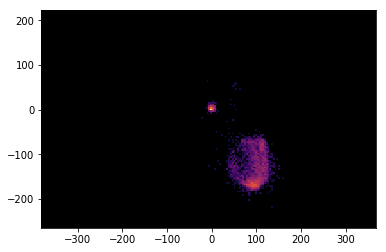

In [61]:
plt.hist2d(counterrotating_particles['Coordinates'][:,0],counterrotating_particles['Coordinates'][:,1],bins=128,cmap='inferno',norm=mpl.colors.LogNorm())
plt.axis('equal')
ax = plt.gca()
ax.set_facecolor('black')
plt.show()

In [73]:
#para el primer subhalo contrarotantemente extenso

SubhaloID = contrarotantes_extensos[1]
snapshot_list = [99,91,84,78,72,67,59,50,40,33,25,21,17,13,11,8,6,4,3,2]
redshift_list = [0,0.1,0.2,0.3,0.4,0.5,0.7,1,1.5,2,3,4,5,6,7,8,9,10,11,12]
scalefactor_list = [1,0.9091,0.8333,0.7692,0.7143,0.667,0.5882,0.5,0.4,0.3333,0.25,0.2,0.1667,0.1429,0.125,0.1111,0.1,0.0909,0.0833,0.0769]

for snapNumID in range(len(snapshot_list)):
    Mass = 2.7373569e+12
    R200 = 199.83599853515625
    basepath = 'sims.TNG/TNG50-1/output'
    
    snapNum = snapshot_list[snapNumID]
    z_redshift = redshift_list[snapNumID]
    a_scalefactor = scalefactor_list[snapNumID]

    stars = circularities_eulermethod(SubhaloID,snapNum,basepath,radius_limit=1.0*R200,minmetal=0.05,maxmetal=3.0,radius_limit_rotation=0.2*R200,minmetal_rotation=0.95,maxmetal_rotation=1.5)
    star = star_particles_rotated_once_eulermethod(SubhaloID, snapNum, basepath,0.2*R200/0.667,0.95,1.5)
    indices_contrarrotantes = np.where(stars['Circularity'] <= -0.7)[0]
    counter_stars = {}
    counter_stars['Masses'] = stars['Masses'][indices_contrarrotantes]
    counter_stars['Coordinates'] = stars['Coordinates'][indices_contrarrotantes]
    counter_stars['Velocities'] = stars['Velocities'][indices_contrarrotantes]
    counter_stars['Potential'] = stars['Potential'][indices_contrarrotantes]
    counter_stars['GFM_StellarFormationTime'] = stars['GFM_StellarFormationTime'][indices_contrarrotantes]
    counter_stars['GFM_Metallicity'] = stars['GFM_Metallicity'][indices_contrarrotantes]
    counter_stars['Distance_to_center'] = stars['Distance_to_center'][indices_contrarrotantes]
    counter_stars['Angular_Momentum'] = stars['Angular_Momentum'][indices_contrarrotantes]
    counter_stars['Total Energy'] = stars['Specific_Energy'][indices_contrarrotantes]
    counter_stars['Circularity'] = stars['Circularity'][indices_contrarrotantes]
    
    counter_stars_df = pd.DataFrame()
    counter_stars_df['M'] = counter_stars['Masses']
    counter_stars_df['x'] = counter_stars['Coordinates'][:,0]
    counter_stars_df['y'] = counter_stars['Coordinates'][:,1]
    counter_stars_df['z'] = counter_stars['Coordinates'][:,2]
    counter_stars_df['Vx'] = counter_stars['Velocities'][:,0]
    counter_stars_df['Vy'] = counter_stars['Velocities'][:,1]
    counter_stars_df['Vz'] = counter_stars['Velocities'][:,2]
    counter_stars_df['Metallicity'] = counter_stars['GFM_Metallicity']
    counter_stars_df['U'] = counter_stars['Potential']
    counter_stars_df['StellarFormationTime'] = counter_stars['GFM_StellarFormationTime']
    counter_stars_df['R'] = counter_stars['Distance_to_center']
    counter_stars_df['Jx'] = counter_stars['Angular_Momentum'][:,0]
    counter_stars_df['Jy'] = counter_stars['Angular_Momentum'][:,1]
    counter_stars_df['Jz'] = counter_stars['Angular_Momentum'][:,2]
    counter_stars_df['Total Energy'] = counter_stars['Total Energy'] #i wrongly called it specific energy dont knuw why
    counter_stars_df['Circularity'] = counter_stars['Circularity']
    
    #transforming by the scale factor
    counter_stars_df['x'] *= a_scalefactor
    counter_stars_df['y'] *= a_scalefactor
    counter_stars_df['z'] *= a_scalefactor
    counter_stars_df['U'] /= a_scalefactor
    
    counter_stars_df.to_csv(f'subhalo_tables_extensives/subhalo{SubhaloID}_snap{snapNum}_counterrotating.csv')
    
    

12.567434864
[[  2.25404928e-07  -1.35007829e-07   2.60709334e+09]]
-----------------------
 [ -1.62204351e+06  -1.72412990e+06   2.60875970e+09]
12.567434864
[[ -1.73064062e-08  -8.80291614e-08   7.88226251e+08]]


KeyError: 'Masses'

In [71]:
"""
Snap	Scale factor	Redshift
2	0.0769	12
3	0.0833	11
4	0.0909	10
6	0.1	9
8	0.1111	8
11	0.125	7
13	0.1429	6
17	0.1667	5
21	0.2	4
25	0.25	3
33	0.3333	2
40	0.4	1.5
50	0.5	1
59	0.5882	0.7
67	0.6667	0.5
72	0.7143	0.4
78	0.7692	0.3
84	0.8333	0.2
91	0.9091	0.1
99	1	0
"""

snapshot_list = [99,91,84,78,72,67,59,50,40,33,25,21,17,13,11,8,6,4,3,2]
redshift_list = [0,0.1,0.2,0.3,0.4,0.5,0.7,1,1.5,2,3,4,5,6,7,8,9,10,11,12]
scalefactor_list = [1,0.9091,0.8333,0.7692,0.7143,0.667,0.5882,0.5,0.4,0.3333,0.25,0.2,0.1667,0.1429,0.125,0.1111,0.1,0.0909,0.0833,0.0769]

for snapNumID in range(len(snapshot_list)):
    snapNum = snapshot_list[snapNumID]
    z_redshift = redshift_list[snapNumID]
    a_scalefactor = scalefactor_list[snapNumID]
    print(snapNum,'|',z_redshift,'|',a_scalefactor)

99 | 0 | 1
91 | 0.1 | 0.9091
84 | 0.2 | 0.8333
78 | 0.3 | 0.7692
72 | 0.4 | 0.7143
67 | 0.5 | 0.667
59 | 0.7 | 0.5882
50 | 1 | 0.5
40 | 1.5 | 0.4
33 | 2 | 0.3333
25 | 3 | 0.25
21 | 4 | 0.2
17 | 5 | 0.1667
13 | 6 | 0.1429
11 | 7 | 0.125
8 | 8 | 0.1111
6 | 9 | 0.1
4 | 10 | 0.0909
3 | 11 | 0.0833
2 | 12 | 0.0769


In [99]:
for SubhaloID in contrarotantes_extensos:
    for SnapNum in snapshot_list:
        stars = il.snapshot.loadSubhalo(basepath, SnapNum, SubhaloID, 'star', fields=['Masses','Coordinates','Velocities','GFM_Metallicity','Potential','GFM_StellarFormationTime'])
        print(SubhaloID,'|',stars['count'],SnapNum)
        if stars['count'] == 0:
            print('---Corte---')
            break

455291.0 | 1179586 99
455291.0 | 0 91
---Corte---
478216.0 | 1005272 99
478216.0 | 0 91
---Corte---
501208.0 | 1468861 99
501208.0 | 0 91
---Corte---
531910.0 | 895464 99
531910.0 | 0 91
---Corte---
547844.0 | 871951 99
547844.0 | 0 91
---Corte---
570319.0 | 456842 99
570319.0 | 0 91
---Corte---
571633.0 | 672125 99
571633.0 | 0 91
---Corte---
582137.0 | 346773 99
582137.0 | 0 91
---Corte---
589496.0 | 419422 99
589496.0 | 0 91
---Corte---
598112.0 | 348547 99
598112.0 | 0 91
---Corte---
606820.0 | 263064 99
606820.0 | 0 91
---Corte---
619381.0 | 217173 99
619381.0 | 0 91
---Corte---
628949.0 | 225729 99
628949.0 | 0 91
---Corte---


  0%|          | 0/13 [00:00<?, ?it/s]

Text(0,0.5,'Total Subhalo Mass [code units]')

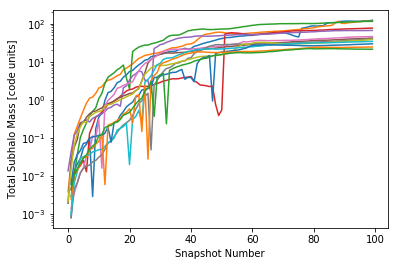

In [104]:
fields = ['SubhaloMass','SubfindID','SnapNum']
for i in tqdm(range(len(contrarotantes_extensos))):
    subhaloid = contrarotantes_extensos[i]
    
    tree = il.sublink.loadTree(basepath,99,subhaloid,fields=fields,onlyMPB=True)
    plt.plot(tree['SnapNum'],tree['SubhaloMass'],'-')
    continue

plt.yscale('log')
plt.xlabel('Snapshot Number')
plt.ylabel('Total Subhalo Mass [code units]')

In [133]:
import matplotlib.font_manager as fm
mpl.rcParams.update({'font.size': 20})
h = 0.667
Subhalos_ids = contrarotantes_extensos

fig = plt.figure(figsize=(28.66, 20.46), dpi=200)
outer = gridspec.GridSpec(4, 4, wspace=0.15, hspace=0.15)

for i in range(13):
    fontprops = fm.FontProperties(size=20)
    subhaloid = Subhalos_ids[i]
    inner = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    ax = plt.Subplot(fig, inner[0:5])

    tree = il.sublink.loadTree(basepath,99,subhaloid,fields=fields,onlyMPB=True)
    ax.plot(tree['SnapNum'],tree['SubhaloMass']*(10**10)/h,'-',label=str('ID:'+str(subhaloid)),color='black')
    ax.legend()
    ax.set_yscale('log')
    if i >= 9:
        ax.set_xlabel('Redshift')
    if (i % 4) == 0:
        ax.set_ylabel('Total Mass[$M_{\odot}$]')
    fig.add_subplot(ax)
fig.savefig('subhalo_tables_extensives/Subhalos_trees.pdf',dpi=100,bbox_inches='tight')
print('subhalo_tables_extensives/Subhalos_trees.pdf')

ValueError: x and y must have same first dimension, but have shapes (20,) and (99,)

<Figure size 5732x4092 with 0 Axes>

In [ ]:
7G     work/deprecated_stuff#Haciendolo para todos los subhalos de interes
snapshot_list = [99,91,84,78,72,67,59,50,40,33,25,21,17,13,11,8,6,4,3,2]
redshift_list = [0,0.1,0.2,0.3,0.4,0.5,0.7,1,1.5,2,3,4,5,6,7,8,9,10,11,12]
scalefactor_list = [1,0.9091,0.8333,0.7692,0.7143,0.667,0.5882,0.5,0.4,0.3333,0.25,0.2,0.1667,0.1429,0.125,0.1111,0.1,0.0909,0.0833,0.0769]
for SubhaloID in contrarotantes_extensos:
    for snapNumID in range(len(snapshot_list)):
        Mass = 2.7373569e+12
        R200 = 199.83599853515625
        basepath = 'sims.TNG/TNG50-1/output'

        snapNum = snapshot_list[snapNumID]
        z_redshift = redshift_list[snapNumID]
        a_scalefactor = scalefactor_list[snapNumID]

        stars = circularities_eulermethod(SubhaloID,snapNum,basepath,radius_limit=1.0*R200,minmetal=0.05,maxmetal=3.0,radius_limit_rotation=0.2*R200,minmetal_rotation=0.95,maxmetal_rotation=1.5)
        star = star_particles_rotated_once_eulermethod(SubhaloID, snapNum, basepath,0.2*R200/0.667,0.95,1.5)
        indices_contrarrotantes = np.where(stars['Circularity'] <= -0.7)[0]
        counter_stars = {}
        counter_stars['Masses'] = stars['Masses'][indices_contrarrotantes]
        counter_stars['Coordinates'] = stars['Coordinates'][indices_contrarrotantes]
        counter_stars['Velocities'] = stars['Velocities'][indices_contrarrotantes]
        counter_stars['Potential'] = stars['Potential'][indices_contrarrotantes]
        counter_stars['GFM_StellarFormationTime'] = stars['GFM_StellarFormationTime'][indices_contrarrotantes]
        counter_stars['GFM_Metallicity'] = stars['GFM_Metallicity'][indices_contrarrotantes]
        counter_stars['Distance_to_center'] = stars['Distance_to_center'][indices_contrarrotantes]
        counter_stars['Angular_Momentum'] = stars['Angular_Momentum'][indices_contrarrotantes]
        counter_stars['Total Energy'] = stars['Specific_Energy'][indices_contrarrotantes]
        counter_stars['Circularity'] = stars['Circularity'][indices_contrarrotantes]

        counter_stars_df = pd.DataFrame()
        counter_stars_df['M'] = counter_stars['Masses']
        counter_stars_df['x'] = counter_stars['Coordinates'][:,0]
        counter_stars_df['y'] = counter_stars['Coordinates'][:,1]
        counter_stars_df['z'] = counter_stars['Coordinates'][:,2]
        counter_stars_df['Vx'] = counter_stars['Velocities'][:,0]
        counter_stars_df['Vy'] = counter_stars['Velocities'][:,1]
        counter_stars_df['Vz'] = counter_stars['Velocities'][:,2]
        counter_stars_df['Metallicity'] = counter_stars['GFM_Metallicity']
        counter_stars_df['U'] = counter_stars['Potential']
        counter_stars_df['StellarFormationTime'] = counter_stars['GFM_StellarFormationTime']
        counter_stars_df['R'] = counter_stars['Distance_to_center']
        counter_stars_df['Jx'] = counter_stars['Angular_Momentum'][:,0]
        counter_stars_df['Jy'] = counter_stars['Angular_Momentum'][:,1]
        counter_stars_df['Jz'] = counter_stars['Angular_Momentum'][:,2]
        counter_stars_df['Total Energy'] = counter_stars['Total Energy'] #i wrongly called it specific energy dont knuw why
        counter_stars_df['Circularity'] = counter_stars['Circularity']

        #transforming by the scale factor
        counter_stars_df['x'] *= a_scalefactor
        counter_stars_df['y'] *= a_scalefactor
        counter_stars_df['z'] *= a_scalefactor
        counter_stars_df['U'] /= a_scalefactor

        counter_stars_df.to_csv(f'subhalo_tables_extensives/subhalo{SubhaloID}_snap{snapNum}_counterrotating.csv')